Original Image Shape: (630, 512)


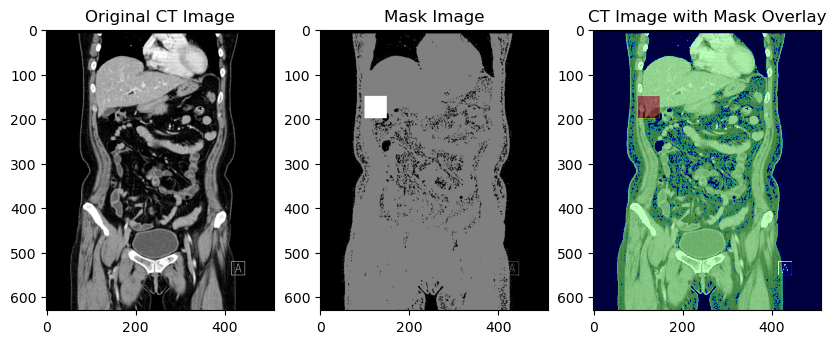

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 이미지를 불러옵니다.
image_path = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더/강은희_19766429_CT/19766429401.jpg'
ct_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지의 차원을 확인합니다.
print("Original Image Shape:", ct_image.shape)

# 난소 종양의 대략적인 위치를 수동으로 지정합니다. 이 값들은 실제 위치에 따라 조정해야 합니다.
# 예시: x = 100, y = 150, width = 50, height = 50
x, y, width, height = 100, 150, 50, 50  # 이 값을 실제 종양의 위치에 맞춰 조정해야 합니다.

# 마스크 배열을 생성합니다.
mask = np.ones_like(ct_image)  # 나머지 부분은 1로 설정합니다.
mask[ct_image == 0] = 0  # 검은 공간(배경)은 0으로 설정합니다.

# 난소 종양 부분을 찾아 2로 설정합니다.
mask[y:y+height, x:x+width] = 2

# 결과를 보여줍니다.
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(ct_image, cmap='gray')
plt.title('Original CT Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask Image')

plt.subplot(1, 3, 3)
plt.imshow(ct_image, cmap='gray', interpolation='none')
plt.imshow(mask, cmap='jet', alpha=0.5)  # 마스크를 원본 이미지 위에 겹쳐서 보여줍니다.
plt.title('CT Image with Mask Overlay')

plt.show()


In [ ]:
import numpy as np
import cv2

# 이미지 파일 경로 설정
original_image_path = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더/강은희_19766429_CT/19766429401.jpg'  # 원본 CT 이미지 경로

# 이미지 로드 (예시로 그레이스케일로 읽어옵니다, 실제에는 채널에 맞게 읽어와야 함)
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

# 그레이스케일 이미지를 2로 나누어 대비를 줄임
scaled_image = original_image // 2  # 이미지의 밝기를 절반으로 줄임

# 난소와 자궁의 위치를 알려주는 레이블 이미지 초기화 (전부 0으로 초기화)
labeled_image = np.zeros_like(scaled_image)

# 난소와 자궁의 대략적인 위치 및 크기를 지정
# 예시 값입니다. 실제 값은 이미지에 따라 다릅니다.
# 이러한 값은 이미지 분석을 통해 얻어야 합니다.
ovary1_coords = (150, 300, 30)  # x, y, radius
ovary2_coords = (200, 300, 30)  # x, y, radius
uterus_coords = (175, 400, 50)  # x, y, radius

# 레이블 1(자궁)과 2(난소)를 지정
cv2.circle(labeled_image, ovary1_coords[:2], ovary1_coords[2], 2, -1)  # 난소 1
cv2.circle(labeled_image, ovary2_coords[:2], ovary2_coords[2], 2, -1)  # 난소 2
cv2.circle(labeled_image, uterus_coords[:2], uterus_coords[2], 1, -1)   # 자궁

# 원본 이미지에 레이블을 적용 (레이블이 있는 위치에 대해서만)
scaled_image[labeled_image == 1] += 1  # 자궁 레이블을 적용
scaled_image[labeled_image == 2] += 2  # 난소 레이블을 적용

# 결과 이미지 표시
cv2.imshow('Labeled Image', scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2

# 이미지 파일 경로 설정
ovary_cyst_path = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더/강은희_19766429_CT/19766429401 복사본.png'  # 난소 위치 표시 이미지
uterus_path = '/Users/kim-yeoeun/Downloads/KakaoTalk_Image_2024-03-08-20-23-46.jpeg'  # 자궁 위치 표시 이미지
ovaries_path = '/Users/kim-yeoeun/Downloads/KakaoTalk_Image_2024-03-08-20-24-13.jpeg'  # 난소 위치 표시 이미지

# 이미지 로드 (예시로 그레이스케일로 읽어옵니다, 실제에는 채널에 맞게 읽어와야 함)
ovary_cyst_image = cv2.imread(ovary_cyst_path, cv2.IMREAD_GRAYSCALE)
uterus_image = cv2.imread(uterus_path, cv2.IMREAD_GRAYSCALE)
ovaries_image = cv2.imread(ovaries_path, cv2.IMREAD_GRAYSCALE)

# 이미지에 대한 마스크 초기화 (모두 배경으로 설정)
mask = np.zeros_like(ovary_cyst_image)

# 빨간 박스와 노란 원의 좌표 설정
# 이 좌표는 실제 위치를 정확히 반영해야 하며, 여기서는 예시로만 제시합니다.
# 실제 좌표는 이미지에서 정확한 위치를 기반으로 추출해야 합니다.
red_box_coords = (30, 370, 160, 100)  # (x, y, width, height)
yellow_circle_uterus_coords = (70, 420, 20)  # (center_x, center_y, radius)
yellow_circle_ovaries_coords = [(50, 440, 15), (130, 440, 15)]  # [(center_x, center_y, radius), ...]

# 빨간 박스 내부 영역을 자궁으로 설정 (레이블 1)
x, y, w, h = red_box_coords
mask[y:y+h, x:x+w] = 1

# 노란 원 내부 영역을 난소로 설정 (레이블 2)
for (center_x, center_y, radius) in yellow_circle_ovaries_coords:
    cv2.circle(mask, (center_x, center_y), radius, 2, -1)  # -1은 원 내부를 채운다는 의미

# 결과를 확인하기 위해 이미지와 마스크를 표시
cv2.imshow('Original Image', ovary_cyst_image)
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


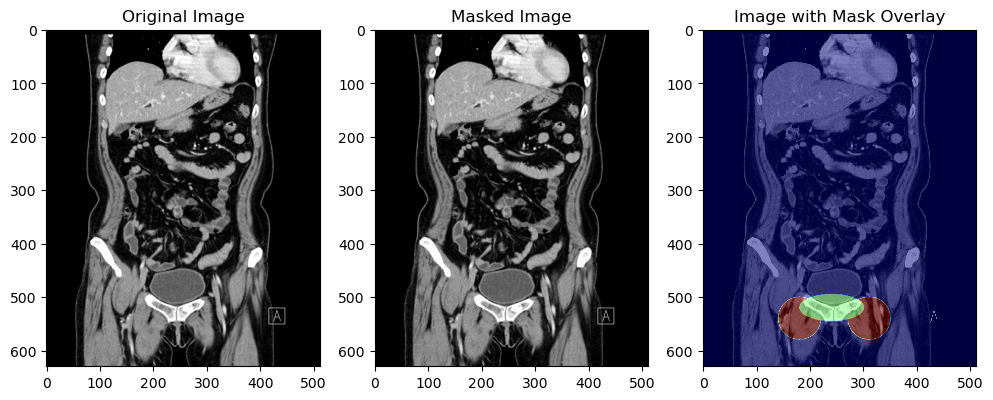

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 이미지 파일 경로 설정
original_image_path = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더/강은희_19766429_CT/19766429401.jpg'  # 원본 CT 이미지 경로

# 이미지 로드 (예시로 그레이스케일로 읽어옵니다, 실제에는 채널에 맞게 읽어와야 함)
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

# 그레이스케일 이미지를 2로 나누어 대비를 줄임
scaled_image = original_image // 2  # 이미지의 밝기를 절반으로 줄임

# 난소와 자궁의 위치를 알려주는 레이블 이미지 초기화 (전부 0으로 초기화)
labeled_image = np.zeros_like(scaled_image)

# 난소와 자궁의 대략적인 위치 및 크기를 지정 (예시 값)
# 여기에서 실제 좌표를 입력해야 합니다.
ovary_coords = [(180, 540, 40), (310, 540, 40)]  # [(x, y, radius), ...]


# 난소 영역에 2를 레이블링합니다.
for x, y, radius in ovary_coords:
    cv2.circle(labeled_image, (x, y), radius, 2, -1)  # 난소 1과 2

ellipse_info = (240, 520), (120, 50), 0  # (중심 x, 중심 y), (긴 축 반지름, 짧은 축 반지름), 회전 각도

# 타원을 그려서 자궁 영역에 레이블링합니다.
cv2.ellipse(labeled_image, ellipse_info, 1, -1)  # 자궁 영역

# 원본 이미지에 레이블을 적용합니다.
masked_image = scaled_image.copy()
masked_image[labeled_image == 1] += 1  # 자궁 레이블 적용
masked_image[labeled_image == 2] += 2  # 난소 레이블 적용

# 이미지를 표시합니다.
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(masked_image, cmap='gray')
plt.title('Masked Image')

plt.subplot(1, 3, 3)
plt.imshow(original_image, cmap='gray', interpolation='none')
plt.imshow(labeled_image, cmap='jet', alpha=0.5)
plt.title('Image with Mask Overlay')

plt.show()


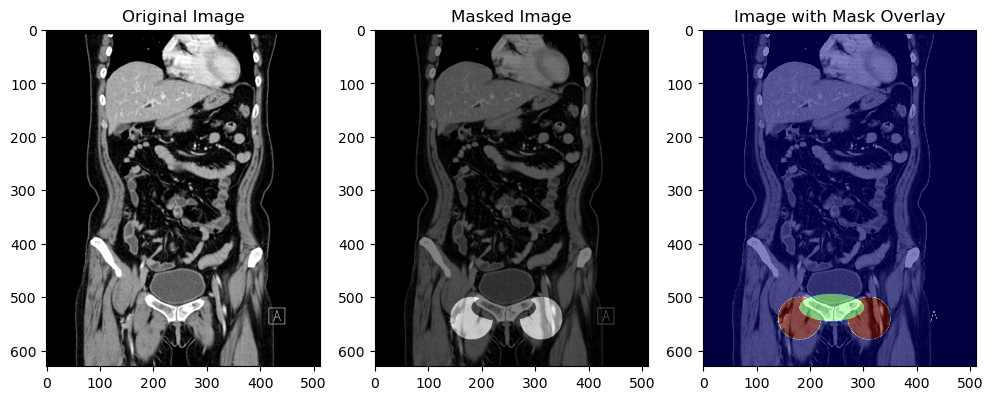

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 이미지 로드 (이 예제에서는 실제 경로 대신 업로드된 이미지를 사용합니다)
original_image_path = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더/강은희_19766429_CT/19766429401.jpg'
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지의 최대값을 구하고 그레이스케일 이미지를 정규화
max_val = np.max(original_image)
scaled_image = original_image / max_val

# 난소와 자궁의 위치를 알려주는 레이블 이미지 초기화 (전부 0으로 초기화)
labeled_image = np.zeros_like(scaled_image, dtype=float)

# 난소와 자궁의 대략적인 위치 및 크기를 지정
ovary_coords = [(180, 540, 40), (310, 540, 40)]  # 난소 위치 및 반지름
ellipse_info = (240, 520), (120, 50), 0  # 자궁 위치 및 타원 정보

# 난소 영역에 레이블링 (여기서는 난소 영역을 +1로 설정합니다)
for x, y, radius in ovary_coords:
    cv2.circle(labeled_image, (x, y), radius, 1, -1)

# 자궁 영역에 레이블링 (여기서는 자궁 영역을 +0.5로 설정합니다)
cv2.ellipse(labeled_image, ellipse_info, 0.5, -1)

# 난소 부분 (레이블이 1인 곳)에 대해서만 원본 이미지에 값을 더합니다.
scaled_image += (labeled_image == 1).astype(float)

# 자궁 부분 (레이블이 0.5인 곳)에 대해서도 원본 이미지에 값을 더합니다.
scaled_image = np.clip(scaled_image, 0, 255)

# 이미지 표시
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(scaled_image, cmap='gray')
plt.title('Masked Image')

plt.subplot(1, 3, 3)
plt.imshow(original_image, cmap='gray', interpolation='none')
plt.imshow(labeled_image, cmap='jet', alpha=0.5)
plt.title('Image with Mask Overlay')

plt.show()


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def label_image(image):
    max_val = np.max(image)
    scaled_image = (image / max_val) * 0.5
    labeled_image = np.zeros_like(scaled_image, dtype=float)

    ovary_coords = [(180, 540, 40), (310, 540, 40)]
    ellipse_info = (240, 520), (120, 50), 0

    for x, y, radius in ovary_coords:
        cv2.circle(labeled_image, (x, y), radius, 1, -1)
    
    cv2.ellipse(labeled_image, ellipse_info, 0.5, -1)

    scaled_image += ((labeled_image == 1) & (scaled_image > 0)).astype(float) * 0.5
    scaled_image += (labeled_image == 0.5).astype(float) * 0.25

    return (scaled_image * 255).astype(np.uint8)

source_folder = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더'  # 수정해야 할 부분
target_folder = '/Users/kim-yeoeun/Desktop/무제폴더_5'  # 수정해야 할 부분

# 폴더에서 이미지 파일 이름 목록 가져오기
image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
selected_images = image_files[:3]  # 처음 3개의 이미지만 선택

for image_name in selected_images:
    image_path = os.path.join(source_folder, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        continue  # 이미지를 읽을 수 없으면 건너뜀

    labeled_image = label_image(image)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(labeled_image, cmap='gray')
    plt.title('Labeled Image')
    plt.axis('off')

    plt.show()


In [5]:
import os
import cv2
import numpy as np

# 난소와 자궁의 대략적인 위치 및 크기를 설정하는 함수
def label_image(image):
    max_val = np.max(image)
    scaled_image = (image / max_val) * 0.5
    labeled_image = np.zeros_like(scaled_image, dtype=float)

    ovary_coords = [(180, 540, 40), (310, 540, 40)]
    ellipse_info = (240, 520), (120, 50), 0

    for x, y, radius in ovary_coords:
        cv2.circle(labeled_image, (x, y), radius, 1, -1)
    
    cv2.ellipse(labeled_image, ellipse_info, 0.5, -1)

    scaled_image += ((labeled_image == 1) & (scaled_image > 0)).astype(float) * 0.5
    scaled_image += (labeled_image == 0.5).astype(float) * 0.25

    return (scaled_image * 255).astype(np.uint8)

source_folder = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더'  # 수정해야 할 부분
target_folder = '/Users/kim-yeoeun/Desktop/무제폴더_5'  # 수정해야 할 부분

# 모든 하위 폴더를 재귀적으로 탐색하고 이미지 처리를 수행하는 함수
def process_images(source_folder, target_folder):
    for subdir, dirs, files in os.walk(source_folder):
        for file in files:
            # 이미지 파일인지 확인
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # 이미지 파일 경로 생성
                image_path = os.path.join(subdir, file)
                
                # 이미지 로드
                original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if original_image is None:
                    continue  # 이미지가 아니면 건너뛰기

                # 이미지에 레이블 적용
                labeled_image = label_image(original_image)

                # 대상 폴더 내에 동일한 하위 폴더 구조 생성
                relative_path = os.path.relpath(subdir, source_folder)
                target_subdir = os.path.join(target_folder, relative_path)
                if not os.path.exists(target_subdir):
                    os.makedirs(target_subdir)

                # 레이블링된 이미지 저장
                target_image_path = os.path.join(target_subdir, file)
                cv2.imwrite(target_image_path, labeled_image)

# 이미지 처리 시작
process_images(source_folder, target_folder)
print("모든 이미지의 마스킹 처리가 완료되었습니다.")


모든 이미지의 마스킹 처리가 완료되었습니다.


In [1]:
#마스크 작업 후 저장

import numpy as np
import cv2
import os

def label_image(image):
    # 이미지의 최대값을 구하고 그레이스케일 이미지를 정규화
    max_val = np.max(image)
    scaled_image = image / max_val

    # 난소와 자궁의 위치를 알려주는 레이블 이미지 초기화
    labeled_image = np.zeros_like(scaled_image, dtype=float)

    # 난소와 자궁의 대략적인 위치 및 크기를 지정
    ovary_coords = [(180, 540, 40), (310, 540, 40)]  # 난소 위치 및 반지름
    ellipse_info = (240, 520), (120, 50), 0  # 자궁 위치 및 타원 정보

    # 난소 영역에 레이블링
    for x, y, radius in ovary_coords:
        cv2.circle(labeled_image, (x, y), radius, 1, -1)
    # 자궁 영역에 레이블링
    cv2.ellipse(labeled_image, ellipse_info, 0.5, -1)

    # 난소 부분에 원본 이미지 값 더하기
    scaled_image += (labeled_image == 1).astype(float)
    # 자궁 부분에 원본 이미지 값 더하기
    scaled_image += (labeled_image == 0.5).astype(float) * 0.5

    # 값의 범위를 [0, 255]로 조정
    scaled_image = np.clip(scaled_image * 255, 0, 255)

    return scaled_image.astype(np.uint8)

def label_and_save_image(image_path, target_subdir):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        print(f"Cannot load image: {image_path}")
        return
    
    labeled_image = label_image(original_image)
    cv2.imwrite(os.path.join(target_subdir, os.path.basename(image_path)), labeled_image)

def process_images(source_folder, target_folder):
    for subdir, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subdir, file)
                
                relative_path = os.path.relpath(subdir, source_folder)
                target_subdir = os.path.join(target_folder, relative_path)
                if not os.path.exists(target_subdir):
                    os.makedirs(target_subdir)
                
                label_and_save_image(image_path, target_subdir)

# 이미지 처리 시작
source_folder = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더'
target_folder = '/Users/kim-yeoeun/Desktop/무제폴더_5'
process_images(source_folder, target_folder)


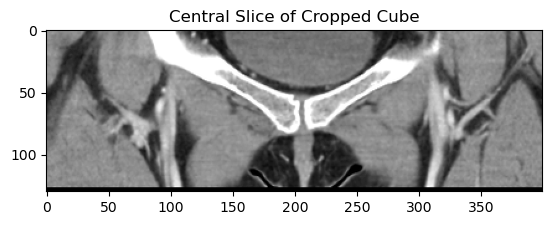

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def process_images(source_folder, crop_coords):
    volume_slices = []
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    # 주어진 좌표에 따라 이미지를 크롭합니다.
                    x1, y1, x2, y2 = crop_coords
                    cropped_image = image[y1:y2, x1:x2]
                    volume_slices.append(cropped_image)
                else:
                    print(f"Cannot load image: {file_path}")

    if len(volume_slices) == 0:
        raise ValueError("No valid image files were found.")
    
    # 크롭된 슬라이스들을 3D 배열로 쌓음
    cropped_volume = np.stack(volume_slices, axis=2)

    return cropped_volume

# 크롭할 영역의 좌표 설정
crop_coords = (50, 500, 450, 800)  # (x1, y1, x2, y2)
source_folder = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더'
cropped_volume = process_images(source_folder, crop_coords)

# 크롭된 볼륨의 중앙 슬라이스 시각화
plt.imshow(cropped_volume[:, :, cropped_volume.shape[2]//2], cmap='gray')
plt.title('Central Slice of Cropped Cube')
plt.show()


In [11]:
#사이즈_리사이징
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def process_and_save_images(source_folder, target_folder, crop_coords):
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            # 지원하는 이미지 파일 형식 필터링
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # 소스와 타겟 파일 경로 생성
                source_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, source_folder)
                target_subdir = os.path.join(target_folder, relative_path)
                
                # 대상 하위 폴더가 없다면 생성
                if not os.path.exists(target_subdir):
                    os.makedirs(target_subdir)
                
                target_path = os.path.join(target_subdir, file)

                # 이미지 로드 및 크롭
                image = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    x1, y1, x2, y2 = crop_coords
                    cropped_image = image[y1:y2, x1:x2]
                    cv2.imwrite(target_path, cropped_image)
                else:
                    print(f"Cannot load image: {source_path}")

# 크롭할 영역의 좌표 설정 (예시로 제공된 좌표)
crop_coords = (50, 500, 450, 800)  # (x1, y1, x2, y2)

# 소스 폴더와 대상 폴더 설정
source_folder = '/Users/kim-yeoeun/Desktop/난소종양_세로폴더'
target_folder = '/Users/kim-yeoeun/Desktop/무제폴더_6'

# 이미지 처리 및 저장 시작
process_and_save_images(source_folder, target_folder, crop_coords)


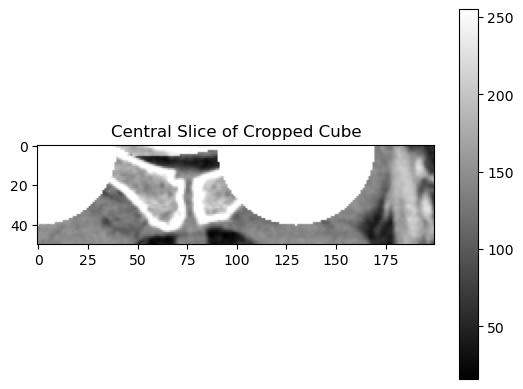

In [9]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def crop_and_stack_images(source_folder, crop_coords):
    # 크롭된 이미지 슬라이스를 저장할 리스트
    cropped_slices = []
    
    # 난소와 자궁 영역을 크롭할 범위
    x1, y1, width, height = crop_coords
    
    for subdir, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subdir, file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                if image is None:
                    print(f"Cannot load image: {image_path}")
                    continue
                
                # 이미지를 불러오고 크롭하기
                cropped_image = image[y1:y1+height, x1:x1+width]
                cropped_slices.append(cropped_image)
    
    # 크롭된 슬라이스들을 3D 볼륨으로 쌓기
    cube = np.stack(cropped_slices, axis=2)
    return cube

# 난소와 자궁의 영역 좌표
ovary_coords = [(180, 540), (310, 540)]  # 난소 위치
ellipse_center = (240, 520)  # 자궁 중심 위치

# 난소와 자궁 영역을 포함하는 크롭 범위 결정
# 예시로 난소와 자궁을 모두 포함하는 크기를 가정합니다.
# 실제 좌표는 마스크 영역을 기반으로 계산해야 합니다.
crop_coords = (180, 540, 200, 50)  # x1, y1, width, height

# 소스 폴더에서 크롭하고 스택하기
source_folder = '/Users/kim-yeoeun/Desktop/무제폴더_5'
cube = crop_and_stack_images(source_folder, crop_coords)

# 큐브의 중앙 슬라이스 시각화
# 큐브의 중앙 슬라이스 시각화
mid_slice = cube[:, :, cube.shape[2]//2]
plt.imshow(mid_slice, cmap='gray')  # 이미지 데이터를 첫 번째 인자로 전달
plt.title('Central Slice of Cropped Cube')  # 이미지 제목을 별도로 설정
plt.colorbar()  # 옵션: 컬러바를 추가하여 그레이스케일 값을 시각화
plt.show()



In [12]:
#이거임!!!!데이터 전처리는 이걸로!

from PIL import Image
import numpy as np
import os

def images_to_3d_numpy(subfolder_path):
    images_array = []

    # 하위 폴더 내의 모든 이미지 파일을 NumPy 배열로 변환
    for filename in os.listdir(subfolder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            file_path = os.path.join(subfolder_path, filename)
            
            with Image.open(file_path) as img:
                numpy_array = np.array(img)
                images_array.append(numpy_array)

    # 모든 이미지 배열을 하나의 3차원 배열로 결합
    combined_array = np.stack(images_array, axis=0)
    return combined_array

def process_subfolders(parent_folder, output_folder):
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)

        if os.path.isdir(subfolder_path):
            combined_array = images_to_3d_numpy(subfolder_path)

            # 변환된 3차원 배열을 저장
            output_file_name = subfolder + '.npy'
            output_file_path = os.path.join(output_folder, output_file_name)
            np.save(output_file_path, combined_array)
            print(f"Saved {output_file_name} in {output_folder}")

# 상위 폴더와 출력 폴더 경로 지정
parent_folder = '/Users/kim-yeoeun/Desktop/무제폴더_5'
output_folder = '/Users/kim-yeoeun/Desktop/무제폴더_7'

# 상위 폴더 내의 모든 하위 폴더 처리
process_subfolders(parent_folder, output_folder)


Saved 이연우_19775346_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 박재현_19365833_2022년 수술전 CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 석수연_19845786_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 양민영_10048706_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 박지윤_18605514_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 진주연_19881062_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김은성_19852726_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 양금희_11379472_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 박미선_16640612.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김효진_16642500_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김소은_19846990_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 하도희_19850174_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 좌유정_19841060_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 이두희_19117926_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김예림_19794905_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 허보람_19500629_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 천수리_1

In [6]:
#흑백이면 전처리 이걸로!

from PIL import Image
import numpy as np
import os

def images_to_4d_numpy(subfolder_path):
    images_array = []

    # 하위 폴더 내의 모든 이미지 파일을 NumPy 배열로 변환
    for filename in sorted(os.listdir(subfolder_path)):  # 파일을 정렬하여 순서대로 처리
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            file_path = os.path.join(subfolder_path, filename)
            
            with Image.open(file_path) as img:
                numpy_array = np.array(img)
                if len(numpy_array.shape) == 2:  # 흑백 이미지인 경우
                    numpy_array = numpy_array[:, :, np.newaxis]  # 채널 차원 추가
                images_array.append(numpy_array)

    # 모든 이미지 배열을 하나의 4차원 배열로 결합
    combined_array = np.stack(images_array, axis=0)
    return combined_array

def process_subfolders(parent_folder, output_folder):
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)

        if os.path.isdir(subfolder_path):
            combined_array = images_to_4d_numpy(subfolder_path)

            # 변환된 4차원 배열을 저장
            output_file_name = subfolder + '.npy'
            output_file_path = os.path.join(output_folder, output_file_name)
            np.save(output_file_path, combined_array)
            print(f"Saved {output_file_name} in {output_folder}")

# 상위 폴더와 출력 폴더 경로 지정
parent_folder = '/Users/kim-yeoeun/Desktop/무제폴더_5'
output_folder = '/Users/kim-yeoeun/Desktop/무제폴더_7'

# 상위 폴더 내의 모든 하위 폴더 처리
process_subfolders(parent_folder, output_folder)


Saved 이연우_19775346_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 박재현_19365833_2022년 수술전 CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 석수연_19845786_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 양민영_10048706_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 박지윤_18605514_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 진주연_19881062_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김은성_19852726_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 양금희_11379472_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 박미선_16640612.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김효진_16642500_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김소은_19846990_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 하도희_19850174_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 좌유정_19841060_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 이두희_19117926_.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 김예림_19794905_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 허보람_19500629_CT.npy in /Users/kim-yeoeun/Desktop/무제폴더_7
Saved 천수리_1

In [ ]:
#mlp_weight(마지막으로 돌린 거 이거)

import pandas as pd
import tensorflow as tf
import os
import re
from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, GlobalAveragePooling3D, Dense, Dropout, Input, concatenate, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from tensorflow.keras.layers import concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split



@tf.function
def custom_loss(y_true, y_pred):
    # Mean Squared Error 계산
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse


# 파일명에서 숫자 부분만 추출하는 함수
def extract_patient_id(filename):
    match = re.search(r'\d+', filename)
    return match.group(0) if match else None

# NaN 값을 포함하는 슬라이스를 제거하는 함수
def remove_nan_slices(images):
    return np.array([img for img in images if not np.isnan(img).any()])

# 차트 데이터 전처리 함수
def preprocess_chart_data(chart_data):
    continuous_features = ['age', 'BMI', 'maxima_size']
    categorical_features = ['surgeon', 'robot_surgery','Symptom', 'Abdominal', 'roc', 'loc', 'roc_loc']
    
    continuous_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('cont', continuous_transformer, continuous_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor.fit_transform(chart_data)

# 차트 데이터 로드
chart_data_path = '/Users/kim-yeoeun/Desktop/무제폴더_7/ct환자_수술시각.csv'
surgery_times_file = pd.read_csv(chart_data_path)

# 차트 데이터 전처리
chart_data_processed = preprocess_chart_data(surgery_times_file)

# 데이터셋 분리
X = chart_data_processed
y = surgery_times_file['surgery_time'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Custom3DCNN(Model):
    def __init__(self, chart_data_shape):
        super(Custom3DCNN, self).__init__()

        # Convolutional and pooling layers
        self.conv1 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu1 = LeakyReLU(alpha=0.1)
        self.pool1 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm1 = BatchNormalization()

        self.conv2 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu2 = LeakyReLU(alpha=0.1)
        self.pool2 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm2 = BatchNormalization()

        self.conv3 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu3 = LeakyReLU(alpha=0.1)
        self.pool3 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm3 = BatchNormalization()

        # Dense layer for chart data
        self.chart_input = Input(shape=chart_data_shape)
        # Custom3DCNN 모델 정의 부분에서 차트 데이터 처리 레이어의 이름 지정
        self.chart_dense1 = Dense(11, activation=None, name='chart_dense1')  # 이름 지정
        self.flatten = Flatten()  # Flatten 레이어 추가
        

        
        self.global_avg_pool = GlobalAveragePooling3D()

        # Adjusted dense layers
        self.fc_layer_pool = Dense(64, activation=None, kernel_initializer='he_normal')  # 별도로 초기화
        self.fc_layer_combined = Dense(75, activation=None)  # 64 + 11 유닛 조합

        self.final_layer = Dense(1, activation=None)

    def call(self, inputs):
        x = self.conv1(inputs[0])
        x = self.leaky_relu1(x)
        x = self.pool1(x)
        x = self.batch_norm1(x)

        x = self.conv2(x)
        x = self.leaky_relu2(x)
        x = self.pool2(x)
        x = self.batch_norm2(x)

        x = self.conv3(x)
        x = self.leaky_relu3(x)
        x = self.pool3(x)
        x = self.batch_norm3(x)

        x = self.global_avg_pool(x)
        x = self.fc_layer_pool(x)

        chart_x = inputs[1]

        # 차트 데이터가 1차원인 경우 차원 확장
        if len(chart_x.shape) == 1:
            chart_x = tf.expand_dims(chart_x, axis=-1)
    
        chart_x = self.chart_dense1(chart_x)
        chart_x = self.flatten(chart_x)  # 필요한 경우 Flatten 적용
    
        combined_x = concatenate([x, chart_x], axis=-1)
        combined_x = self.fc_layer_combined(combined_x)

        return self.final_layer(combined_x)


# 모델 인스턴스화
model = Custom3DCNN(chart_data_shape=X_train.shape[1:])

# 가정: model의 입력이 이미지 데이터와 차트 데이터로 구성
# 더미 데이터 생성
dummy_image_data = np.zeros((1, 64, 64, 64, 3))  # 모델에 맞는 적절한 형태로 조정 필요
dummy_chart_data = np.zeros((1, X_train.shape[1]))  # 차트 데이터 입력 크기에 맞게 조정

# 모델에 더미 데이터를 통과시켜 내부 변수 초기화
# 이미지 데이터와 차트 데이터를 리스트로 묶어서 전달
model([dummy_image_data, dummy_chart_data])

# 가중치 로드
model.load_weights('/Users/kim-yeoeun/Downloads/mlp_model_weights_3.h5', by_name=True, skip_mismatch=True)

# 데이터 로드 및 전처리 함수

def load_and_preprocess_data(folder_path, chart_data_path):
    data = []
    # CSV 파일 로드 및 차트 데이터 전처리
    surgery_times_file = pd.read_csv(chart_data_path)
    chart_data_processed = preprocess_chart_data(surgery_times_file)

    for filename in os.listdir(folder_path):
        if filename.endswith('.npy'):
            patient_id = extract_patient_id(filename)
            file_path = os.path.join(folder_path, filename)
            images = np.load(file_path)
            images = remove_nan_slices(images)

            # 환자 ID에 해당하는 차트 데이터 추출
            patient_data = surgery_times_file[surgery_times_file['id'] == int(patient_id)]

            if not patient_data.empty:
                chart_row = chart_data_processed[patient_data.index]
                # 필요한 정보 추출
                surgery_time = patient_data['surgery_time'].values[0]
                age = patient_data['age'].values[0]  
                surgeon = patient_data['surgeon'].values[0]
                robot_surgery = patient_data['robot_surgery'].values[0]
                Symptom = patient_data['Symptom'].values[0]
                BMI = patient_data['BMI'].values[0]
                Abdominal = patient_data['Abdominal'].values[0]
                roc = patient_data['roc'].values[0]
                loc = patient_data['loc'].values[0]
                roc_loc = patient_data['roc_loc'].values[0]
                maxima_size = patient_data['maxima_size'].values[0]
                # ... (다른 필요한 정보 추출) ...

                # 추출된 정보를 데이터에 추가
                data.append((patient_id, images, chart_row, surgery_time, age, surgeon, robot_surgery, Symptom, BMI, Abdominal, roc, loc, roc_loc, maxima_size))
            else:
                print(f"Warning: No data found for patient ID {patient_id}")

    return data, chart_data_processed


# 사용 예시:
image_folder_path = '/Users/kim-yeoeun/Desktop/무제폴더_7'
chart_data_path = '/Users/kim-yeoeun/Desktop/무제폴더_7/ct환자_수술시각.csv'
data, chart_data_processed = load_and_preprocess_data(image_folder_path, chart_data_path)

# 데이터를 트레인과 테스트로 분리

train_data = data[:40]  # 처음 5개 환자를 트레인 데이터로 사용
test_data = data[40:] # 나머지 환자를 테스트 데이터로 사용  




def crop_specific_area(img, start_x, start_y, width, height):
    return img[start_y:start_y+height, start_x:start_x+width]


def preprocess_images(data, target_size=(64, 64)):
    processed_images = []
    labels = []
    patient_ids = []
    additional_info_list = []  # 추가 정보를 저장할 리스트

    for item in data:
        patient_id, images, chart_row, surgery_time, *additional_info = item
        
        # 이미지의 크기가 target_size와 다르면 조정합니다.
        if images.shape[1:4] != target_size:
            resized_images = [resize(img_slice, target_size, preserve_range=True) for img_slice in images]
            images = np.stack(resized_images, axis=0)
       
        # 각 이미지 슬라이스에 대해 0보다 큰 값만 남깁니다.
        processed_slices = []
        for img_slice in images:
            processed_slice = img_slice.copy()
            processed_slice[processed_slice <= 1] = 0  # 0 이하 값을 0으로 설정
            processed_slices.append(processed_slice)
        
        # 처리된 슬라이스들을 다시 쌓습니다.
        processed_image = np.stack(processed_slices, axis=0)

        processed_images.append(processed_image)
        labels.append(surgery_time)  # 수술 시간을 라벨로 사용
        patient_ids.append(patient_id)
        additional_info_list.append(additional_info)  # 추가 정보를 리스트에 추가
    
    # 이미지 데이터를 0에서 1 사이로 정규화합니다.
    images = np.array(processed_images, dtype='float32') / np.max(processed_images)
    labels = np.array(labels, dtype='float32').reshape(-1, 1)
    chart_data = np.array([info[0] for info in additional_info_list], dtype='float32')  # 차트 데이터를 numpy 배열로 변환
    
    return patient_ids, images, labels, chart_data



# 함수 호출
train_patient_ids, train_images, train_labels, train_chart_data = preprocess_images(train_data)
test_patient_ids, test_images, test_labels, test_chart_data = preprocess_images(test_data)


# 모델에 입력으로 제공할 데이터의 차원을 확인합니다.
print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

print("Train data Shape:", len(train_data))
print("Test data Shape:", len(test_data))

print(train_images[0][0])


# 첫 번째 훈련 이미지의 첫 번째 슬라이스 시각화
plt.imshow(train_images[0][0], cmap='gray')
plt.show()


# 첫 번째 훈련 데이터셋의 모든 이미지 슬라이스 시각화
for i, image_slice in enumerate(train_images[0]):
    plt.imshow(image_slice, cmap='gray')
    plt.title(f"Slice {i} (Filtered)")
    plt.show()


# 모델 구성 및 컴파일
model = Custom3DCNN(chart_data_shape=chart_data_processed.shape[1:])
model.compile(optimizer='adam', loss=custom_loss)



# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 값
    patience=10,         # 성능이 개선되지 않는 에포크를 얼마나 기다릴지
    verbose=1            # 훈련 중단 메시지 출력 여부
)




# ModelCheckpoint 콜백 정의
#저장된 모델의 가중치는 model.load_weights(filepath)를 통해 불러올 수 있음.
model_checkpoint = ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}_loss_{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# 모델 훈련
history = model.fit(
    [train_images, train_chart_data], train_labels,
    batch_size=8,
    validation_data=([test_images, test_chart_data], test_labels),
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]  # early_stopping과 model_checkpoint 추가
)

predicted_surgery_times = model.predict([test_images, test_chart_data])
# MAE와 RMSE 계산
mae, rmse = calculate_metrics(test_labels, predicted_surgery_times)

# 결과 출력
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")

# 개별 환자에 대한 예측 결과 출력
for i in range(len(test_images)):
    print(f"환자 ID: {test_patient_ids[i]}, 실제 수술 시각: {test_labels[i]}, 예측한 수술 시각: {predicted_surgery_times[i][0]}")

2024-03-16 14:09:28.767918: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-16 14:51:35.157074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train Images Shape: (90, 40, 128, 256, 1)
Test Images Shape: (67, 40, 128, 256, 1)
Train data Shape: 90
Test data Shape: 67
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


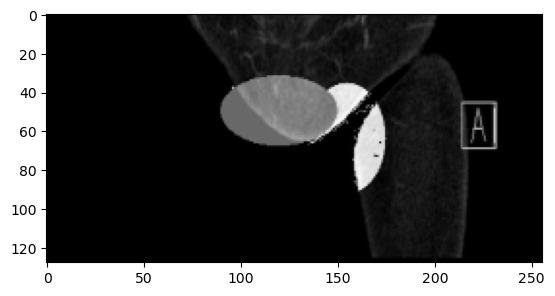

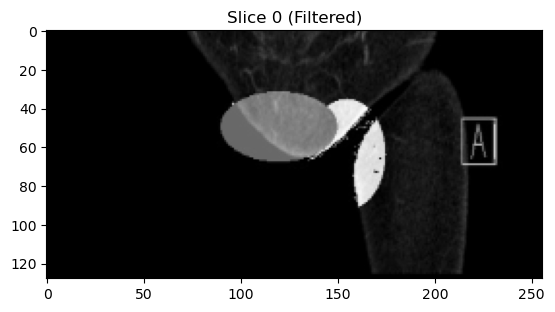

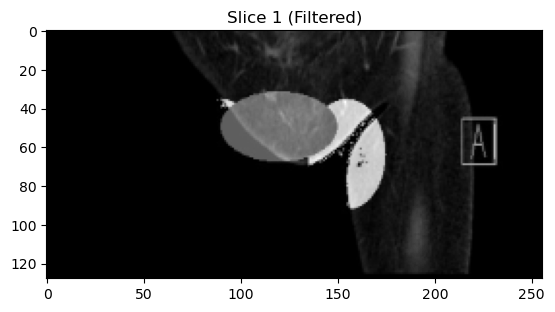

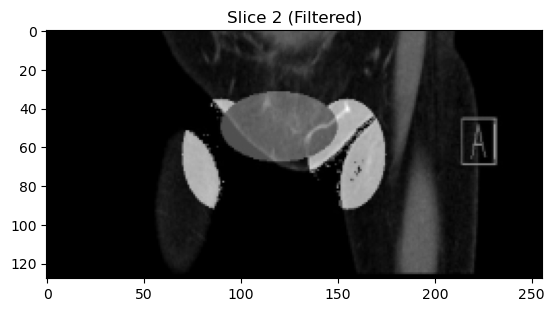

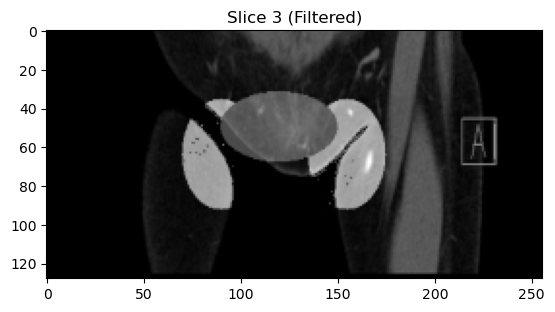

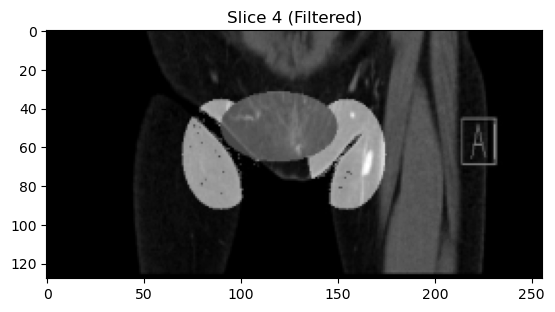

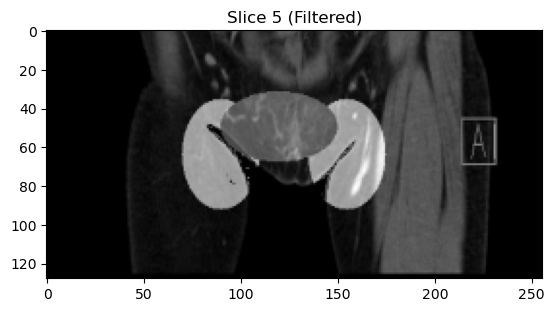

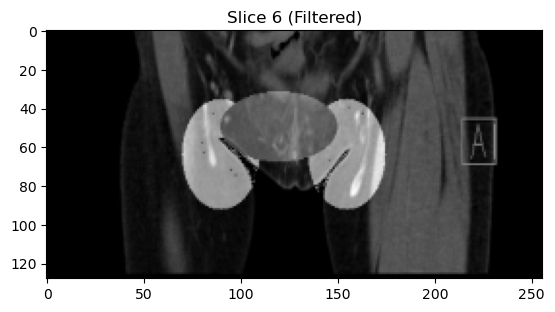

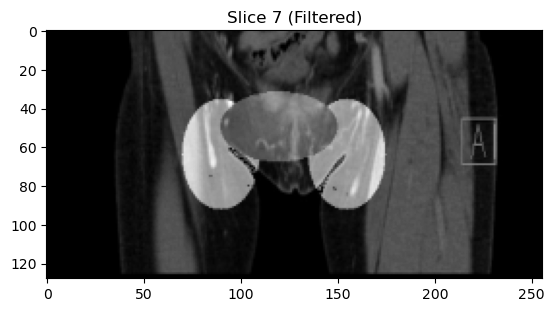

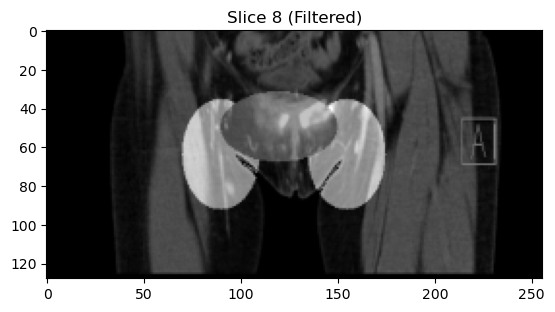

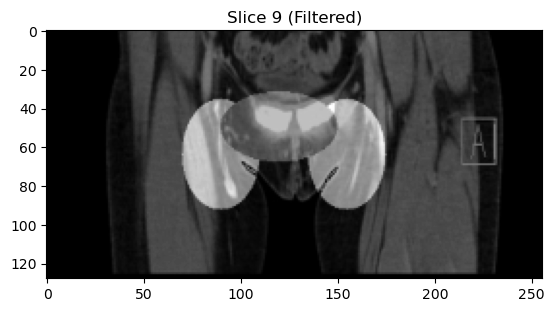

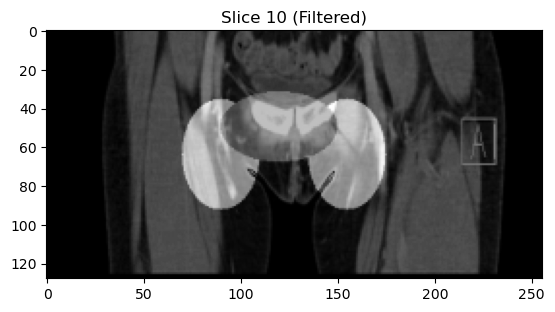

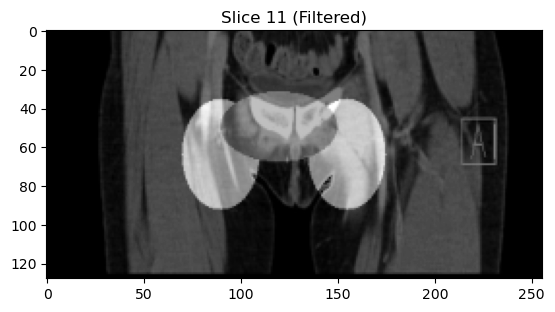

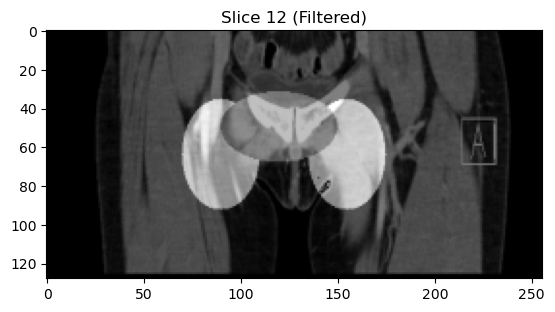

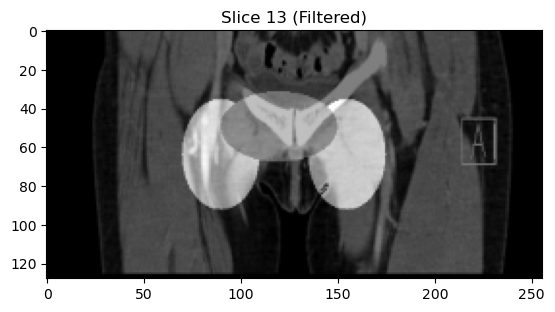

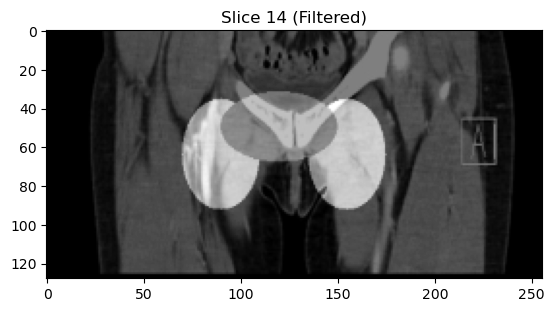

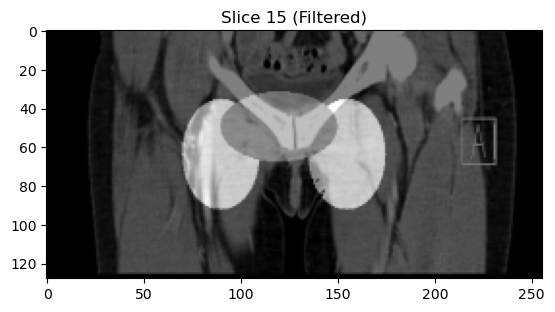

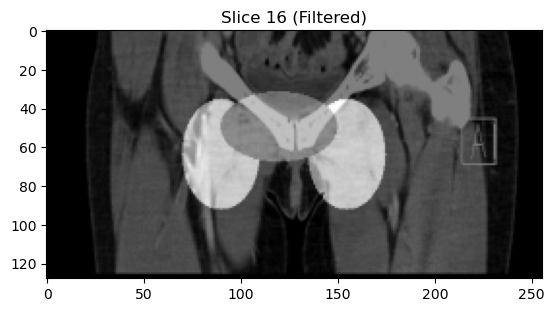

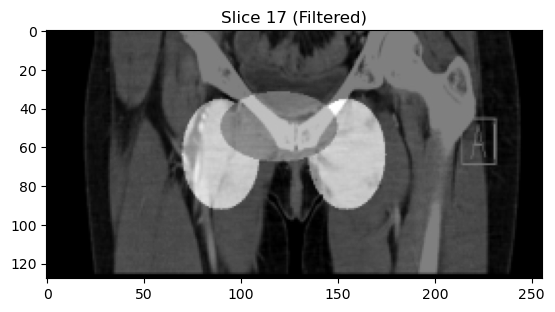

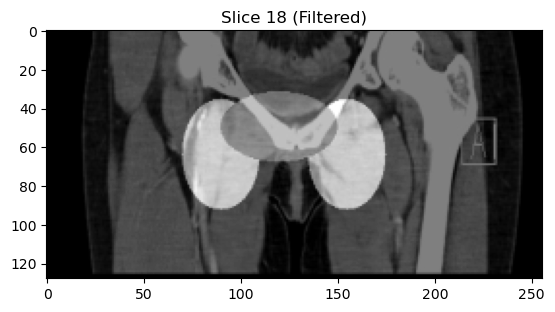

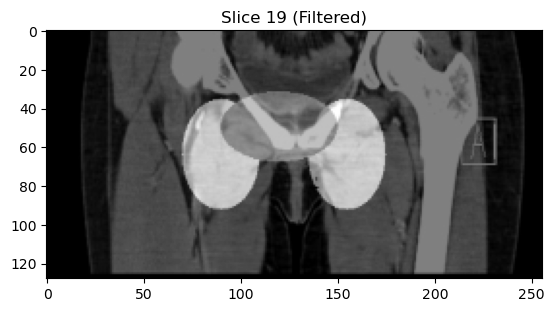

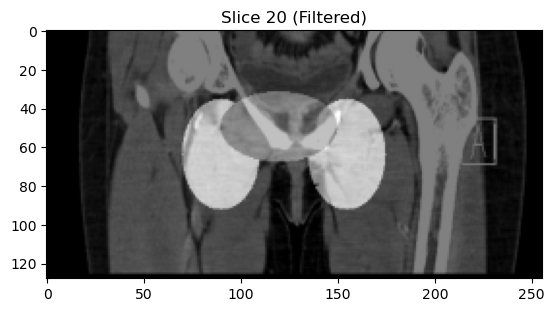

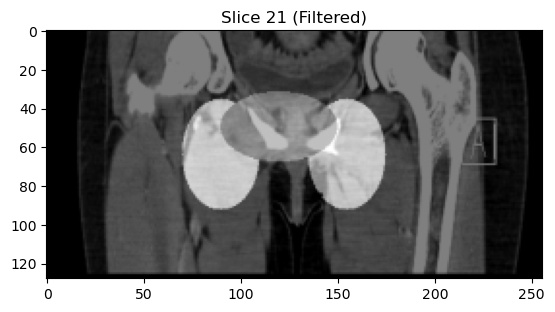

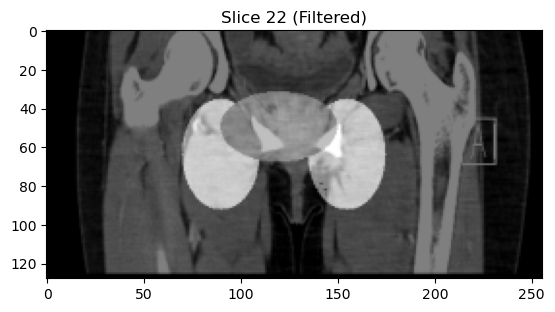

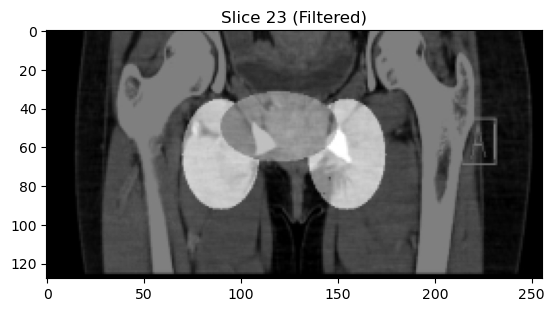

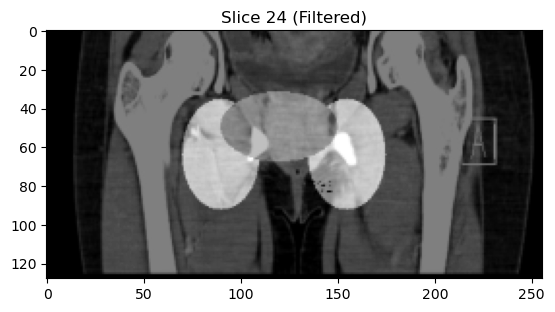

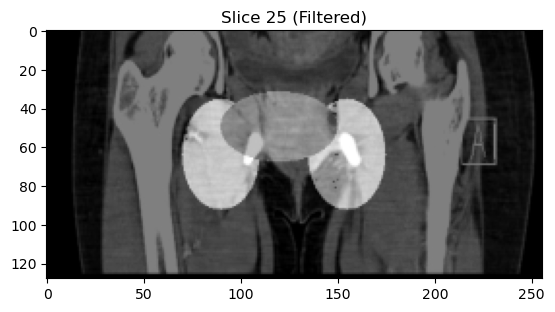

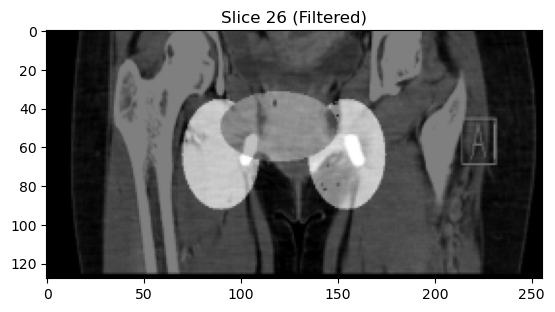

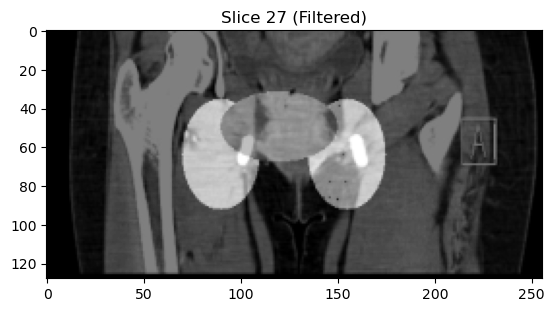

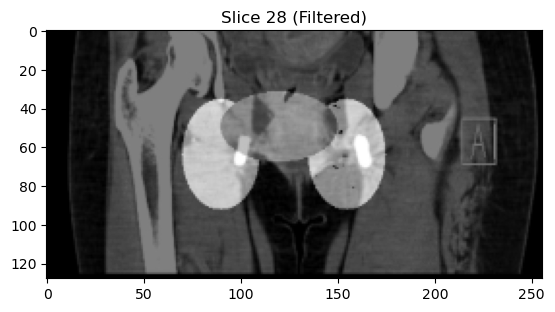

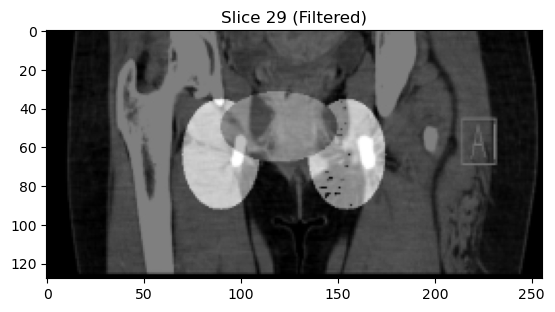

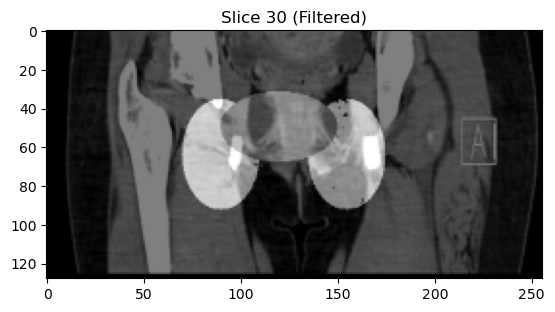

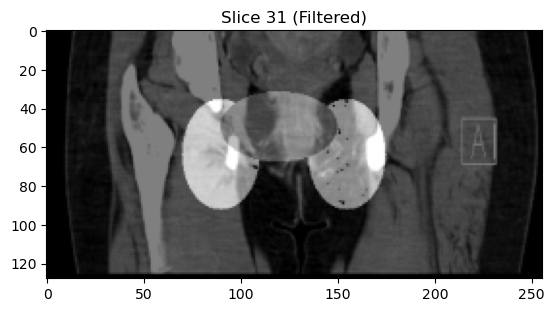

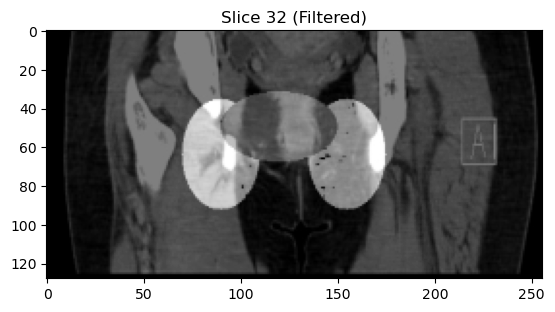

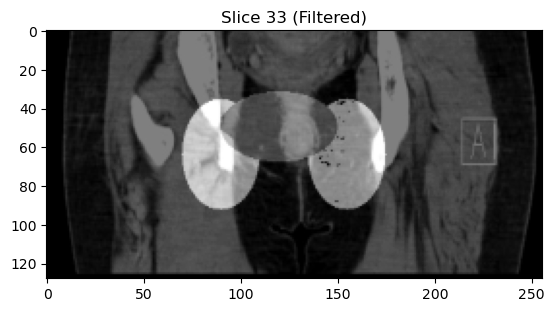

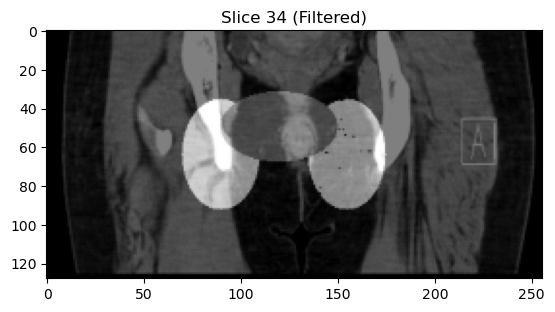

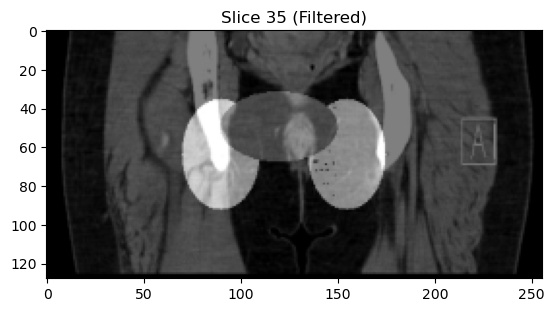

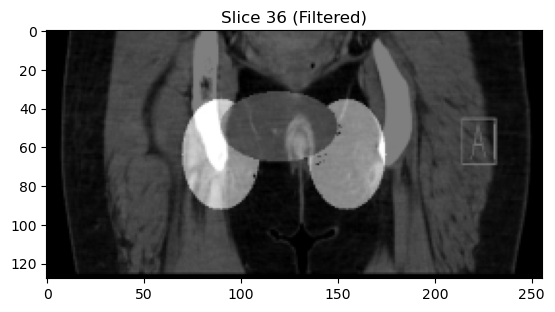

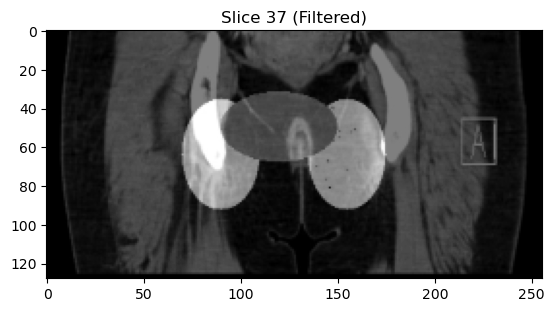

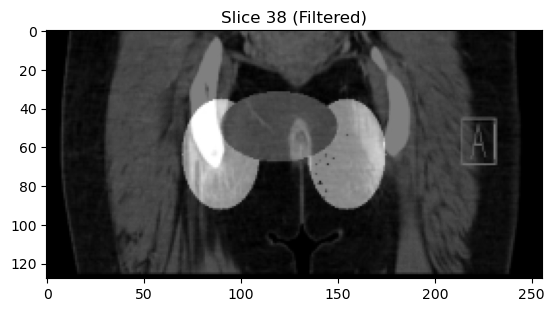

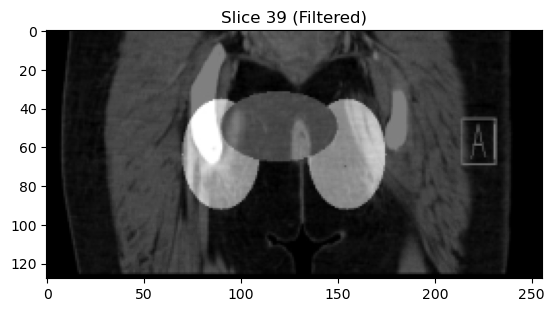

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 2433.1643 
Epoch 1: val_loss improved from inf to 1644.90076, saving model to model_weights_epoch_01_loss_1644.90.hdf5
12/12 [==============================] - 192s 16s/step - loss: 2433.1643 - val_loss: 1644.9008
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 1493.9502 
Epoch 2: val_loss improved from 1644.90076 to 1345.20874, saving model to model_weights_epoch_02_loss_1345.21.hdf5
12/12 [==============================] - 174s 14s/step - loss: 1493.9502 - val_loss: 1345.2087
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 1313.6027 
Epoch 3: val_loss improved from 1345.20874 to 1316.44373, saving model to model_weights_epoch_03_loss_1316.44.hdf5
12/12 [==============================] - 173s 14s/step - loss: 1313.6027 - val_loss: 1316.4437
Epoch 4/10
12/12 [==============================] - ETA: 0s - loss: 1265.0920 
Epoch 4: val_loss did not improve from 1316.44373
12/12 [====

In [1]:
#mlp_weight(2024.03.13::차트데이터 수정 후)

import pandas as pd
import tensorflow as tf
import os
import re
from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, GlobalAveragePooling3D, Dense, Dropout, Input, concatenate, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from tensorflow.keras.layers import concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split



@tf.function
def custom_loss(y_true, y_pred):
    # Mean Squared Error 계산
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse


# 파일명에서 숫자 부분만 추출하는 함수
def extract_patient_id(filename):
    match = re.search(r'\d+', filename)
    return match.group(0) if match else None

# NaN 값을 포함하는 슬라이스를 제거하는 함수
def remove_nan_slices(images):
    return np.array([img for img in images if not np.isnan(img).any()])

# 차트 데이터 전처리 함수
def preprocess_chart_data(chart_data):
    continuous_features = ['age', 'BMI', 'maxima_size']
    categorical_features = ['surgeon', 'robot_surgery','Symptom', 'Abdominal', 'roc', 'loc', 'roc_loc']
    
    continuous_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('cont', continuous_transformer, continuous_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor.fit_transform(chart_data)

# 차트 데이터 로드
chart_data_path = '/Users/kim-yeoeun/Desktop/무제폴더_7/ct환자_수술시각.csv'
surgery_times_file = pd.read_csv(chart_data_path)

# 차트 데이터 전처리
chart_data_processed = preprocess_chart_data(surgery_times_file)

# 타겟 데이터 설정
y = surgery_times_file['surgery_time'].values

# 데이터셋 분리 (행 기준으로 1~90은 훈련, 91부터 끝까지는 테스트)
train_rows = 90  # 1부터 90행까지 훈련 데이터

X_train = chart_data_processed[:train_rows]
y_train = y[:train_rows]

X_test = chart_data_processed[train_rows:]
y_test = y[train_rows:]


class Custom3DCNN(Model):
    def __init__(self, chart_data_shape):
        super(Custom3DCNN, self).__init__()

        # Convolutional and pooling layers
        self.conv1 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu1 = LeakyReLU(alpha=0.1)
        self.pool1 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm1 = BatchNormalization()

        self.conv2 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu2 = LeakyReLU(alpha=0.1)
        self.pool2 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm2 = BatchNormalization()

        self.conv3 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu3 = LeakyReLU(alpha=0.1)
        self.pool3 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm3 = BatchNormalization()

        # Dense layer for chart data
        self.chart_input = Input(shape=chart_data_shape)
        # Custom3DCNN 모델 정의 부분에서 차트 데이터 처리 레이어의 이름 지정
        self.chart_dense1 = Dense(11, activation=None, name='chart_dense1')  # 이름 지정
        self.flatten = Flatten()  # Flatten 레이어 추가
        

        
        self.global_avg_pool = GlobalAveragePooling3D()

        # Adjusted dense layers
        self.fc_layer_pool = Dense(64, activation=None, kernel_initializer='he_normal')  # 별도로 초기화
        self.fc_layer_combined = Dense(75, activation=None)  # 64 + 11 유닛 조합

        self.final_layer = Dense(1, activation=None)

    def call(self, inputs):
        x = self.conv1(inputs[0])
        x = self.leaky_relu1(x)
        x = self.pool1(x)
        x = self.batch_norm1(x)

        x = self.conv2(x)
        x = self.leaky_relu2(x)
        x = self.pool2(x)
        x = self.batch_norm2(x)

        x = self.conv3(x)
        x = self.leaky_relu3(x)
        x = self.pool3(x)
        x = self.batch_norm3(x)

        x = self.global_avg_pool(x)
        x = self.fc_layer_pool(x)

        chart_x = inputs[1]

        # 차트 데이터가 1차원인 경우 차원 확장
        if len(chart_x.shape) == 1:
            chart_x = tf.expand_dims(chart_x, axis=-1)
    
        chart_x = self.chart_dense1(chart_x)
        chart_x = self.flatten(chart_x)  # 필요한 경우 Flatten 적용
    
        combined_x = concatenate([x, chart_x], axis=-1)
        combined_x = self.fc_layer_combined(combined_x)

        return self.final_layer(combined_x)


# MLP 모델의 가중치 로드
mlp_weights_path = '/Users/kim-yeoeun/Downloads/mlp_model_weights_3.h5'

# Custom3DCNN 모델 인스턴스 생성
model = Custom3DCNN(chart_data_shape=X_train.shape[1:])

# 더미 데이터로 모델 내부 구조 초기화
# 이는 모델의 입력 형태를 명확히 하고, 모든 레이어가 올바르게 구성되었는지 확인하기 위함입니다.
dummy_image_data = np.zeros((1, 64, 64, 64, 3))
dummy_chart_data = np.zeros((1, X_train.shape[1]))
model([dummy_image_data, dummy_chart_data])

# MLP 모델에서 학습된 가중치를 Custom3DCNN 모델로 전이
# by_name=True를 설정하여 이름이 일치하는 레이어에만 가중치를 로드합니다.
# skip_mismatch=True를 설정하여 구조가 일치하지 않는 레이어는 스킵합니다.
model.load_weights(mlp_weights_path, by_name=True, skip_mismatch=True)


# 데이터 로드 및 전처리 함수

def load_and_preprocess_data(folder_path, chart_data_path):
    data = []
    # CSV 파일 로드 및 차트 데이터 전처리
    surgery_times_file = pd.read_csv(chart_data_path)
    chart_data_processed = preprocess_chart_data(surgery_times_file)

    for filename in os.listdir(folder_path):
        if filename.endswith('.npy'):
            patient_id = extract_patient_id(filename)
            file_path = os.path.join(folder_path, filename)
            images = np.load(file_path)
            images = remove_nan_slices(images)

            # 환자 ID에 해당하는 차트 데이터 추출
            patient_data = surgery_times_file[surgery_times_file['id'] == int(patient_id)]

            if not patient_data.empty:
                chart_row = chart_data_processed[patient_data.index]
                # 필요한 정보 추출
                surgery_time = patient_data['surgery_time'].values[0]
                age = patient_data['age'].values[0]  
                surgeon = patient_data['surgeon'].values[0]
                robot_surgery = patient_data['robot_surgery'].values[0]
                Symptom = patient_data['Symptom'].values[0]
                BMI = patient_data['BMI'].values[0]
                Abdominal = patient_data['Abdominal'].values[0]
                roc = patient_data['roc'].values[0]
                loc = patient_data['loc'].values[0]
                roc_loc = patient_data['roc_loc'].values[0]
                maxima_size = patient_data['maxima_size'].values[0]
                # ... (다른 필요한 정보 추출) ...

                # 추출된 정보를 데이터에 추가
                data.append((patient_id, images, chart_row, surgery_time, age, surgeon, robot_surgery, Symptom, BMI, Abdominal, roc, loc, roc_loc, maxima_size))
            else:
                print(f"Warning: No data found for patient ID {patient_id}")

    return data, chart_data_processed


# 사용 예시:
image_folder_path = '/Users/kim-yeoeun/Desktop/무제폴더_7'
chart_data_path = '/Users/kim-yeoeun/Desktop/무제폴더_7/ct환자_수술시각.csv'
data, chart_data_processed = load_and_preprocess_data(image_folder_path, chart_data_path)

# 데이터를 트레인과 테스트로 분리

train_data = data[:90]  # 처음 5개 환자를 트레인 데이터로 사용
test_data = data[90:] # 나머지 환자를 테스트 데이터로 사용  




def crop_specific_area(img, start_x, start_y, width, height):
    return img[start_y:start_y+height, start_x:start_x+width]


# 이미지 전처리 및 크롭하는 함수 수정
def preprocess_images(data, crop_coords, target_size=(128, 256)):
    processed_images = []
    labels = []
    patient_ids = []
    additional_info_list = []

    for item in data:
        patient_id, images, chart_row, surgery_time, *additional_info = item

        # 이미지의 크기 조정 및 크롭
        processed_slices = []
        for img_slice in images:
            # 크롭 좌표에 따라 이미지를 크롭합니다.
            cropped_image = crop_specific_area(img_slice, *crop_coords)
            # 크롭한 이미지의 크기를 목표 크기로 조정합니다.
            resized_image = resize(cropped_image, target_size, preserve_range=True)
            processed_slices.append(resized_image)

        processed_image = np.stack(processed_slices, axis=0)
        processed_images.append(processed_image)
        labels.append(surgery_time)
        patient_ids.append(patient_id)
        additional_info_list.append(additional_info)

    # 이미지 데이터를 0에서 1 사이로 정규화합니다.
    images = np.array(processed_images, dtype='float32') / np.max(processed_images)
    labels = np.array(labels, dtype='float32').reshape(-1, 1)
    chart_data = np.array([info[0] for info in additional_info_list], dtype='float32')

    return patient_ids, images, labels, chart_data

# 크롭할 영역의 좌표 설정
crop_coords = (0, 450, 512, 630)  # 예시 좌표입니다. 필요에 따라 수정하세요.

# 함수 호출 예시
train_patient_ids, train_images, train_labels, train_chart_data = preprocess_images(train_data, crop_coords)
test_patient_ids, test_images, test_labels, test_chart_data = preprocess_images(test_data, crop_coords)



# 모델에 입력으로 제공할 데이터의 차원을 확인합니다.
print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

print("Train data Shape:", len(train_data))
print("Test data Shape:", len(test_data))

print(train_images[0][0])


# 첫 번째 훈련 이미지의 첫 번째 슬라이스 시각화
plt.imshow(train_images[0][0], cmap='gray')
plt.show()


# 첫 번째 훈련 데이터셋의 모든 이미지 슬라이스 시각화
for i, image_slice in enumerate(train_images[0]):
    plt.imshow(image_slice, cmap='gray')
    plt.title(f"Slice {i} (Filtered)")
    plt.show()


# 모델 구성 및 컴파일
model = Custom3DCNN(chart_data_shape=chart_data_processed.shape[1:])
model.compile(optimizer='adam', loss=custom_loss)



# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 값
    patience=10,         # 성능이 개선되지 않는 에포크를 얼마나 기다릴지
    verbose=1            # 훈련 중단 메시지 출력 여부
)




# ModelCheckpoint 콜백 정의
#저장된 모델의 가중치는 model.load_weights(filepath)를 통해 불러올 수 있음.
model_checkpoint = ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}_loss_{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# 모델 훈련
history = model.fit(
    [train_images, train_chart_data], train_labels,
    batch_size=8,
    validation_data=([test_images, test_chart_data], test_labels),
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]  # early_stopping과 model_checkpoint 추가
)

predicted_surgery_times = model.predict([test_images, test_chart_data])
# MAE와 RMSE 계산
mae, rmse = calculate_metrics(test_labels, predicted_surgery_times)

# 결과 출력
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")

# 개별 환자에 대한 예측 결과 출력
for i in range(len(test_images)):
    print(f"환자 ID: {test_patient_ids[i]}, 실제 수술 시각: {test_labels[i]}, 예측한 수술 시각: {predicted_surgery_times[i][0]}")

/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


y_train shape: (169, 3)
y_test shape: (19, 3)
Train Images Shape: (90, 40, 128, 256, 1)
Test Images Shape: (67, 40, 128, 256, 1)
Train data Shape: 90
Test data Shape: 67
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


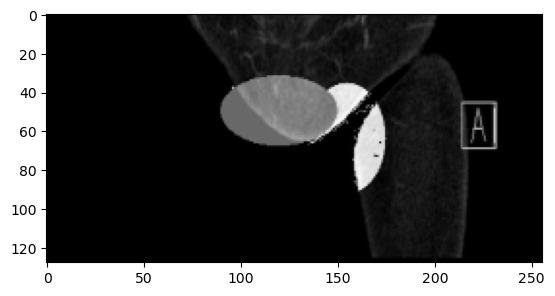

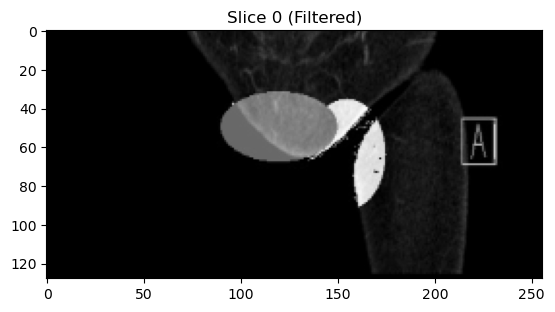

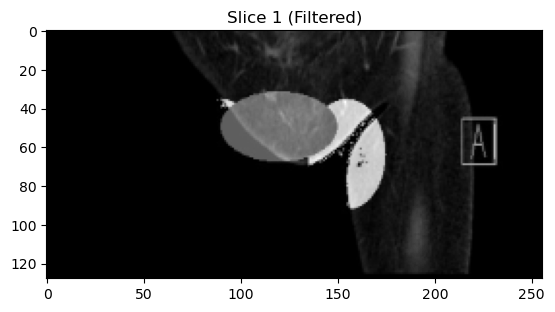

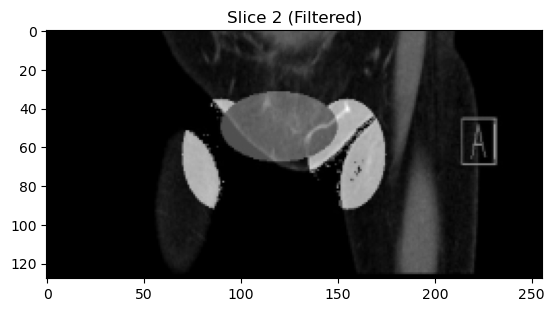

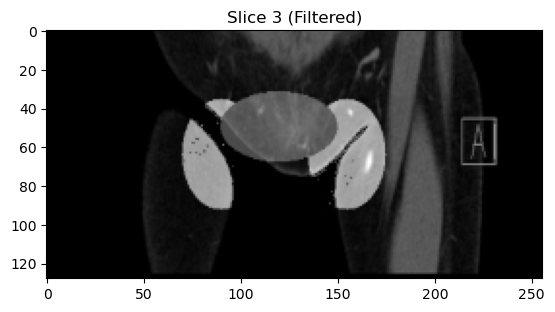

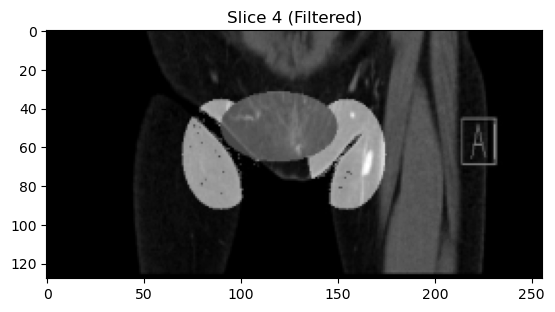

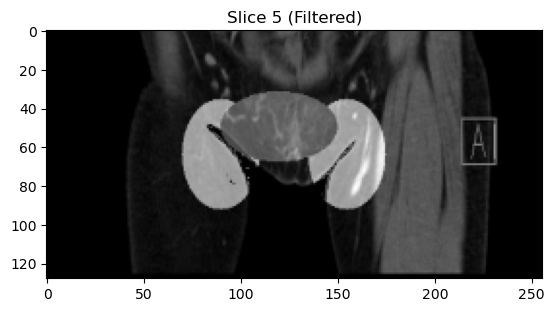

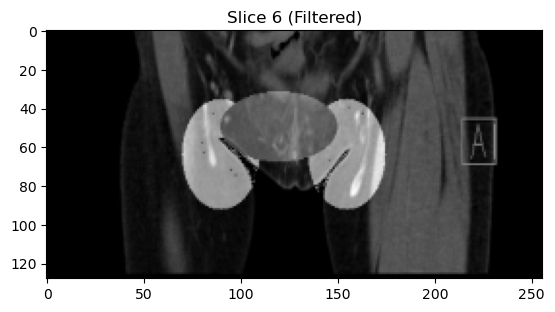

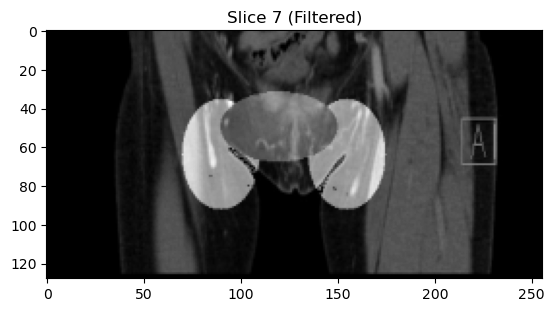

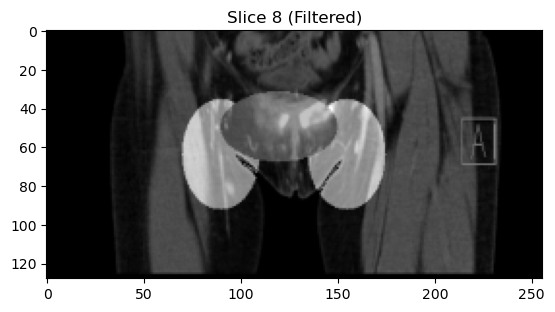

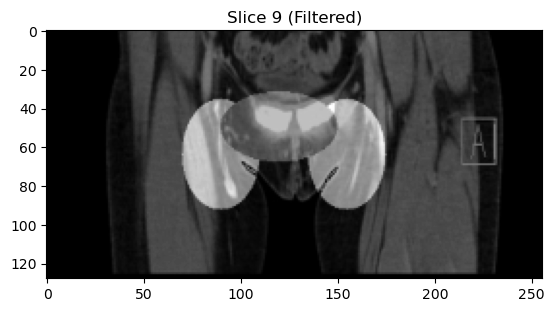

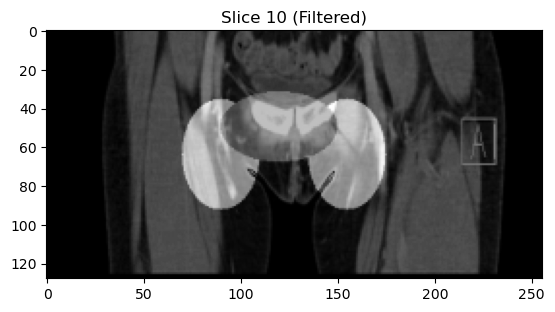

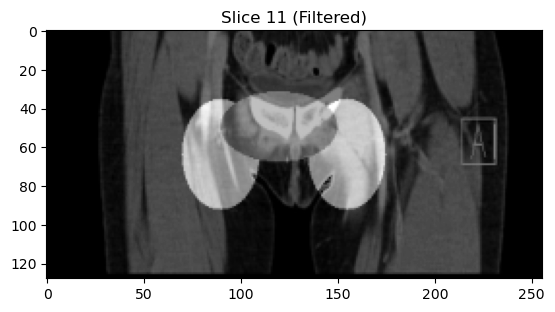

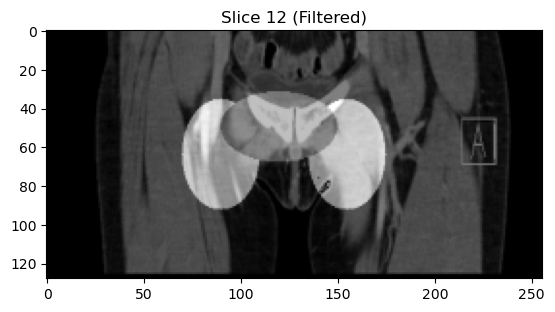

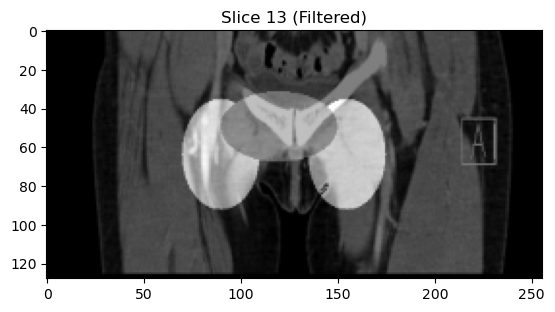

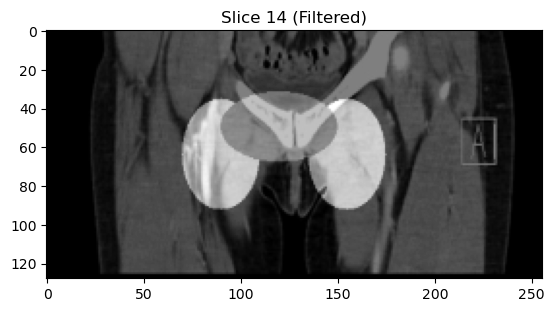

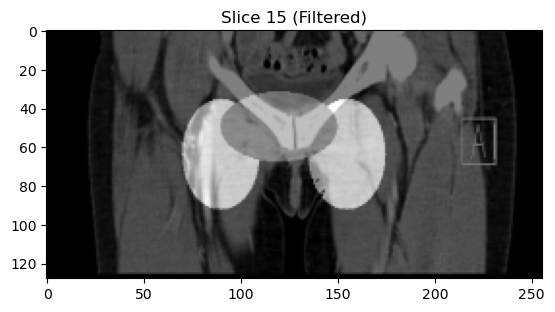

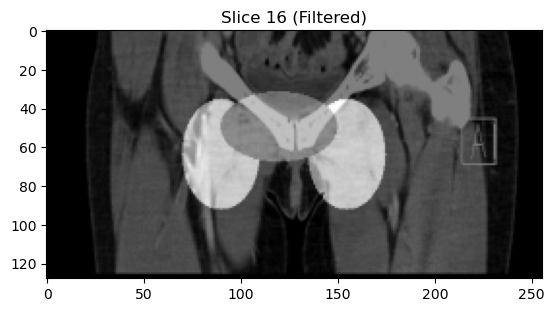

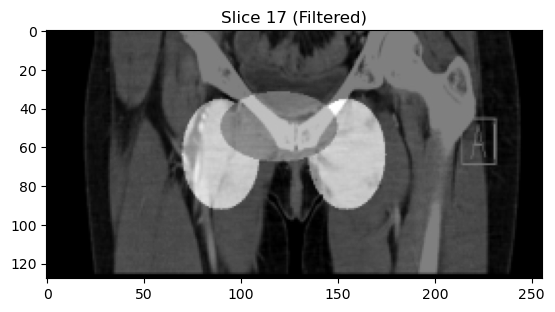

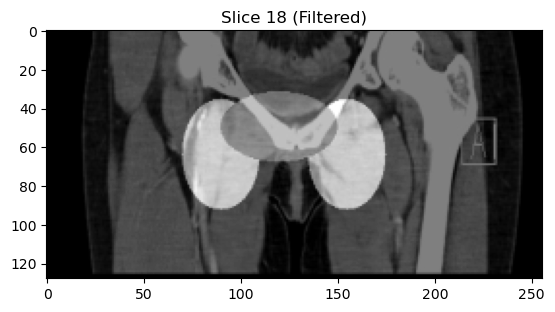

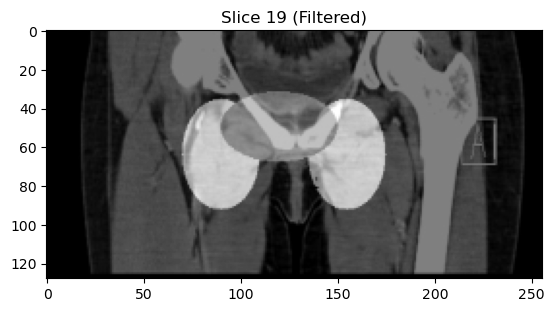

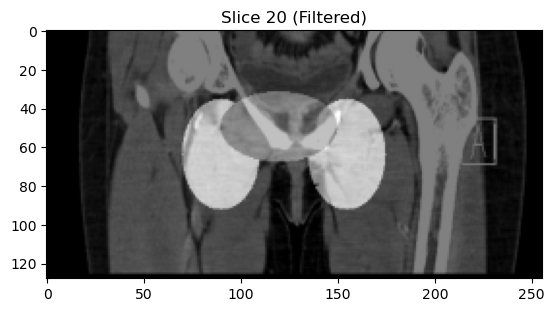

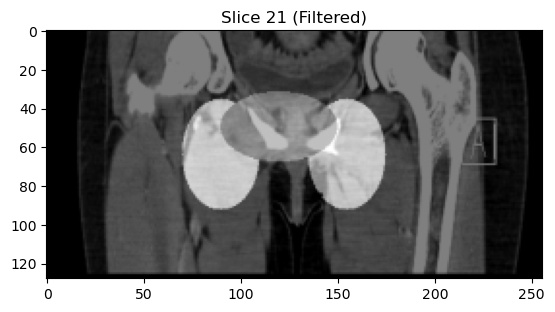

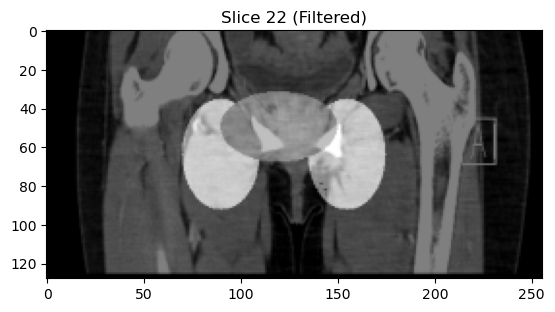

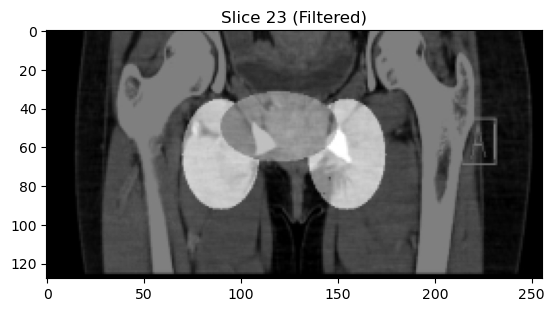

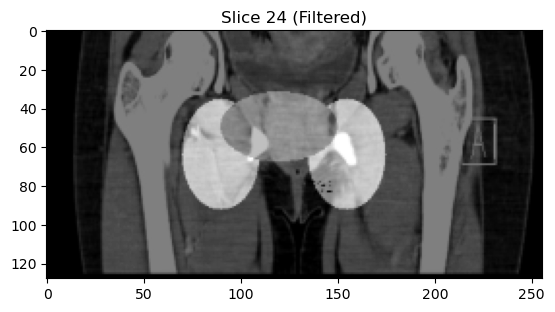

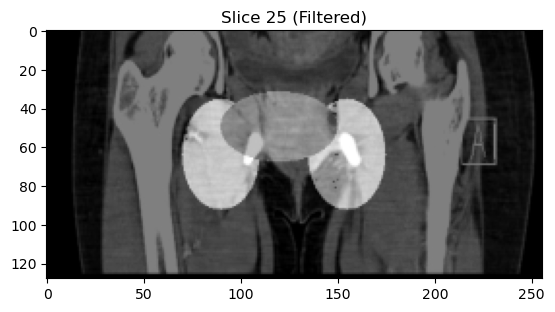

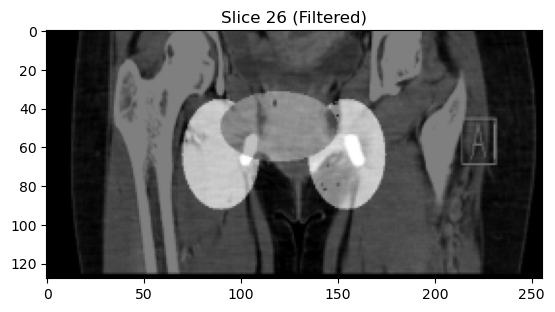

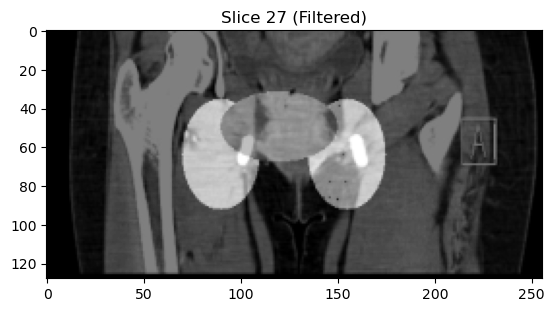

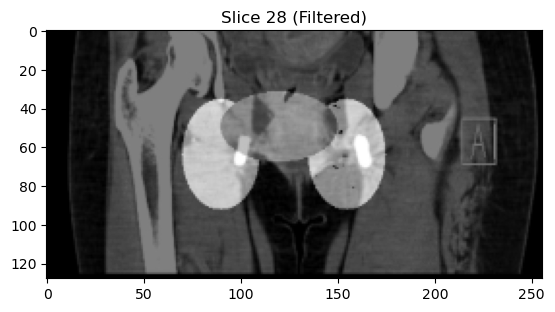

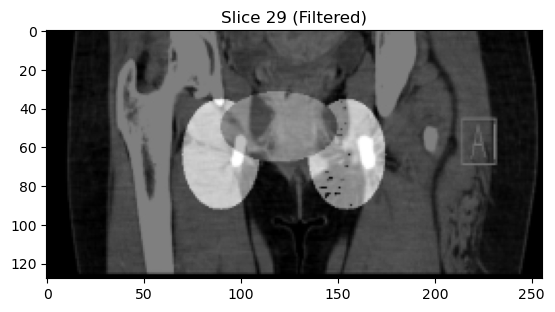

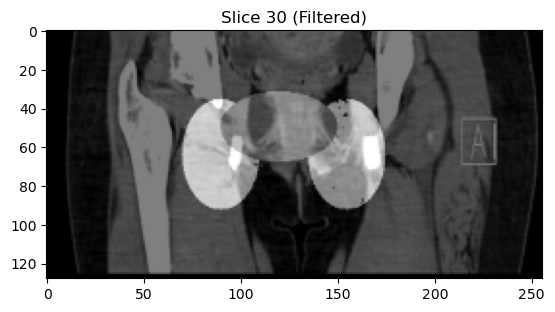

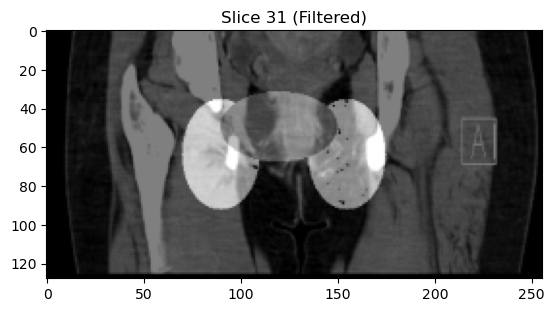

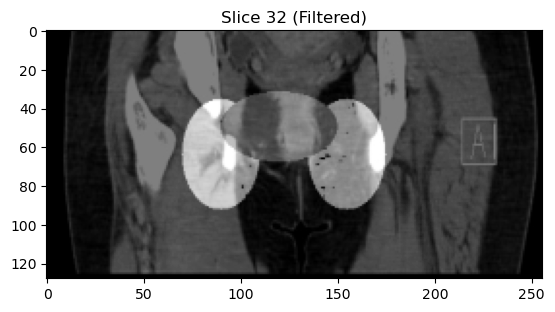

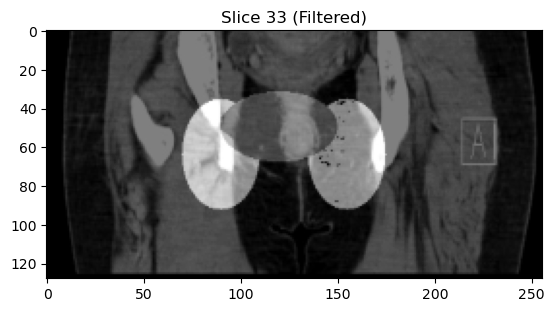

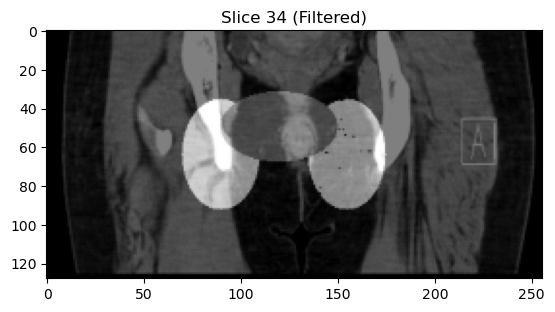

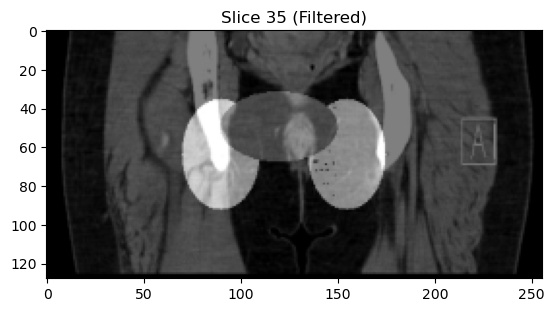

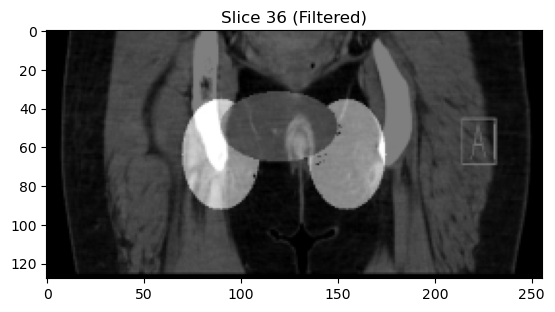

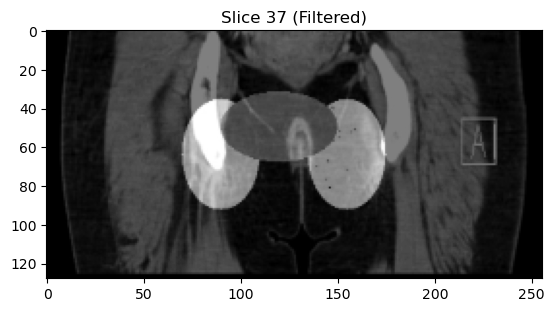

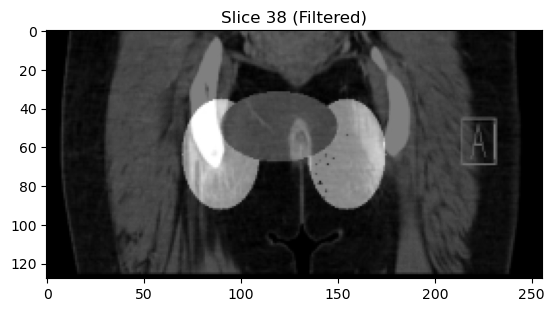

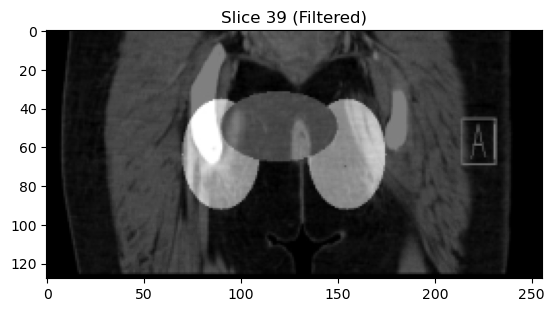

Epoch 1/10


ValueError: in user code:

    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/kim-yeoeun/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [9]:
import pandas as pd
import tensorflow as tf
import os
import re
from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, GlobalAveragePooling3D, Dense, Dropout, Input, concatenate, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from tensorflow.keras.layers import concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split



@tf.function
def custom_loss(y_true, y_pred):
    # Mean Squared Error 계산
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse


# 파일명에서 숫자 부분만 추출하는 함수
def extract_patient_id(filename):
    match = re.search(r'\d+', filename)
    return match.group(0) if match else None

# NaN 값을 포함하는 슬라이스를 제거하는 함수
def remove_nan_slices(images):
    return np.array([img for img in images if not np.isnan(img).any()])

# 차트 데이터 전처리 함수
def preprocess_chart_data(chart_data):
    continuous_features = ['age', 'BMI', 'maxima_size']
    categorical_features = ['surgeon', 'robot_surgery','Symptom', 'Abdominal', 'roc', 'loc', 'roc_loc']
    
    continuous_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('cont', continuous_transformer, continuous_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor.fit_transform(chart_data)

# 차트 데이터 로드
chart_data_path = '/Users/kim-yeoeun/Desktop/무제폴더_7/ct환자_수술시각.csv'
surgery_times_file = pd.read_csv(chart_data_path)

# 차트 데이터 전처리
chart_data_processed = preprocess_chart_data(surgery_times_file)

# 타겟 데이터 설정
y = surgery_times_file['surgery_time'].values

def encode_surgery_time(y):
    # 수술 시간을 구간으로 분류
    y_binned = np.digitize(y, bins=[30, 60], right=True)
    # 원-핫 인코딩 적용
    encoder = OneHotEncoder(sparse=False)
    y_encoded = encoder.fit_transform(y_binned.reshape(-1, 1))
    return y_encoded

# 원-핫 인코딩 적용
y_encoded = encode_surgery_time(surgery_times_file['surgery_time'].values)

# 데이터셋 분리 (행 기준으로 1~90은 훈련, 91부터 끝까지는 테스트)
train_rows = 90  # 1부터 90행까지 훈련 데이터

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(chart_data_processed, y_encoded, test_size=0.1, random_state=42)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

class Custom3DCNN(Model):
    def __init__(self, chart_data_shape):
        super(Custom3DCNN, self).__init__()

        # Convolutional and pooling layers
        self.conv1 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu1 = LeakyReLU(alpha=0.1)
        self.pool1 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm1 = BatchNormalization()

        self.conv2 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu2 = LeakyReLU(alpha=0.1)
        self.pool2 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm2 = BatchNormalization()

        self.conv3 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu3 = LeakyReLU(alpha=0.1)
        self.pool3 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm3 = BatchNormalization()

        # Dense layer for chart data
        self.chart_input = Input(shape=chart_data_shape)
        # Custom3DCNN 모델 정의 부분에서 차트 데이터 처리 레이어의 이름 지정
        self.chart_dense1 = Dense(11, activation=None, name='chart_dense1')  # 이름 지정
        self.flatten = Flatten()  # Flatten 레이어 추가
        

        
        self.global_avg_pool = GlobalAveragePooling3D()

        # Adjusted dense layers
        self.fc_layer_pool = Dense(64, activation=None, kernel_initializer='he_normal')  # 별도로 초기화
        self.fc_layer_combined = Dense(75, activation=None)  # 64 + 11 유닛 조합

        self.final_layer = Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs[0])
        x = self.leaky_relu1(x)
        x = self.pool1(x)
        x = self.batch_norm1(x)

        x = self.conv2(x)
        x = self.leaky_relu2(x)
        x = self.pool2(x)
        x = self.batch_norm2(x)

        x = self.conv3(x)
        x = self.leaky_relu3(x)
        x = self.pool3(x)
        x = self.batch_norm3(x)

        x = self.global_avg_pool(x)
        x = self.fc_layer_pool(x)

        chart_x = inputs[1]

        # 차트 데이터가 1차원인 경우 차원 확장
        if len(chart_x.shape) == 1:
            chart_x = tf.expand_dims(chart_x, axis=-1)
    
        chart_x = self.chart_dense1(chart_x)
        chart_x = self.flatten(chart_x)  # 필요한 경우 Flatten 적용
    
        combined_x = concatenate([x, chart_x], axis=-1)
        combined_x = self.fc_layer_combined(combined_x)

        return self.final_layer(combined_x)


# MLP 모델의 가중치 로드
mlp_weights_path = '/Users/kim-yeoeun/Downloads/mlp_model_weights_3.h5'

# Custom3DCNN 모델 인스턴스 생성
model = Custom3DCNN(chart_data_shape=X_train.shape[1:])

# 더미 데이터로 모델 내부 구조 초기화
# 이는 모델의 입력 형태를 명확히 하고, 모든 레이어가 올바르게 구성되었는지 확인하기 위함입니다.
dummy_image_data = np.zeros((1, 64, 64, 64, 3))
dummy_chart_data = np.zeros((1, X_train.shape[1]))
model([dummy_image_data, dummy_chart_data])

# MLP 모델에서 학습된 가중치를 Custom3DCNN 모델로 전이
# by_name=True를 설정하여 이름이 일치하는 레이어에만 가중치를 로드합니다.
# skip_mismatch=True를 설정하여 구조가 일치하지 않는 레이어는 스킵합니다.
model.load_weights(mlp_weights_path, by_name=True, skip_mismatch=True)


# 데이터 로드 및 전처리 함수

def load_and_preprocess_data(folder_path, chart_data_path):
    data = []
    # CSV 파일 로드 및 차트 데이터 전처리
    surgery_times_file = pd.read_csv(chart_data_path)
    chart_data_processed = preprocess_chart_data(surgery_times_file)

    for filename in os.listdir(folder_path):
        if filename.endswith('.npy'):
            patient_id = extract_patient_id(filename)
            file_path = os.path.join(folder_path, filename)
            images = np.load(file_path)
            images = remove_nan_slices(images)

            # 환자 ID에 해당하는 차트 데이터 추출
            patient_data = surgery_times_file[surgery_times_file['id'] == int(patient_id)]

            if not patient_data.empty:
                chart_row = chart_data_processed[patient_data.index]
                # 필요한 정보 추출
                surgery_time = patient_data['surgery_time'].values[0]
                age = patient_data['age'].values[0]  
                surgeon = patient_data['surgeon'].values[0]
                robot_surgery = patient_data['robot_surgery'].values[0]
                Symptom = patient_data['Symptom'].values[0]
                BMI = patient_data['BMI'].values[0]
                Abdominal = patient_data['Abdominal'].values[0]
                roc = patient_data['roc'].values[0]
                loc = patient_data['loc'].values[0]
                roc_loc = patient_data['roc_loc'].values[0]
                maxima_size = patient_data['maxima_size'].values[0]
                # ... (다른 필요한 정보 추출) ...

                # 추출된 정보를 데이터에 추가
                data.append((patient_id, images, chart_row, surgery_time, age, surgeon, robot_surgery, Symptom, BMI, Abdominal, roc, loc, roc_loc, maxima_size))
            else:
                print(f"Warning: No data found for patient ID {patient_id}")

    return data, chart_data_processed


# 사용 예시:
image_folder_path = '/Users/kim-yeoeun/Desktop/무제폴더_7'
chart_data_path = '/Users/kim-yeoeun/Downloads/ct환자_수술시각_2.csv'
data, chart_data_processed = load_and_preprocess_data(image_folder_path, chart_data_path)

# 데이터를 트레인과 테스트로 분리

train_data = data[:90]  # 처음 5개 환자를 트레인 데이터로 사용
test_data = data[90:] # 나머지 환자를 테스트 데이터로 사용  




def crop_specific_area(img, start_x, start_y, width, height):
    return img[start_y:start_y+height, start_x:start_x+width]


# 이미지 전처리 및 크롭하는 함수 수정
def preprocess_images(data, crop_coords, target_size=(128, 256)):
    processed_images = []
    labels = []
    patient_ids = []
    additional_info_list = []

    for item in data:
        patient_id, images, chart_row, surgery_time, *additional_info = item

        # 이미지의 크기 조정 및 크롭
        processed_slices = []
        for img_slice in images:
            # 크롭 좌표에 따라 이미지를 크롭합니다.
            cropped_image = crop_specific_area(img_slice, *crop_coords)
            # 크롭한 이미지의 크기를 목표 크기로 조정합니다.
            resized_image = resize(cropped_image, target_size, preserve_range=True)
            processed_slices.append(resized_image)

        processed_image = np.stack(processed_slices, axis=0)
        processed_images.append(processed_image)
        labels.append(surgery_time)
        patient_ids.append(patient_id)
        additional_info_list.append(additional_info)

    # 이미지 데이터를 0에서 1 사이로 정규화합니다.
    images = np.array(processed_images, dtype='float32') / np.max(processed_images)
    labels = np.array(labels, dtype='float32').reshape(-1, 1)
    chart_data = np.array([info[0] for info in additional_info_list], dtype='float32')

    return patient_ids, images, labels, chart_data

# 크롭할 영역의 좌표 설정
crop_coords = (0, 450, 512, 630)  # 예시 좌표입니다. 필요에 따라 수정하세요.

# 함수 호출 예시
train_patient_ids, train_images, train_labels, train_chart_data = preprocess_images(train_data, crop_coords)
test_patient_ids, test_images, test_labels, test_chart_data = preprocess_images(test_data, crop_coords)



# 모델에 입력으로 제공할 데이터의 차원을 확인합니다.
print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

print("Train data Shape:", len(train_data))
print("Test data Shape:", len(test_data))

print(train_images[0][0])


# 첫 번째 훈련 이미지의 첫 번째 슬라이스 시각화
plt.imshow(train_images[0][0], cmap='gray')
plt.show()


# 첫 번째 훈련 데이터셋의 모든 이미지 슬라이스 시각화
for i, image_slice in enumerate(train_images[0]):
    plt.imshow(image_slice, cmap='gray')
    plt.title(f"Slice {i} (Filtered)")
    plt.show()


# 모델 구성 및 컴파일
model = Custom3DCNN(chart_data_shape=chart_data_processed.shape[1:])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 값
    patience=10,         # 성능이 개선되지 않는 에포크를 얼마나 기다릴지
    verbose=1            # 훈련 중단 메시지 출력 여부
)




# ModelCheckpoint 콜백 정의
#저장된 모델의 가중치는 model.load_weights(filepath)를 통해 불러올 수 있음.
model_checkpoint = ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}_loss_{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# 모델 훈련
history = model.fit(
    [train_images, train_chart_data], train_labels,
    batch_size=8,
    validation_data=([test_images, test_chart_data], test_labels),
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]  # early_stopping과 model_checkpoint 추가
)

predicted_surgery_times = model.predict([test_images, test_chart_data])
# MAE와 RMSE 계산
mae, rmse = calculate_metrics(test_labels, predicted_surgery_times)

# 결과 출력
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
predicted_classes = np.argmax(predicted_surgery_times, axis=1)

# 개별 환자에 대한 예측 결과 출력
for i in range(len(test_images)):
    print(f"환자 ID: {test_patient_ids[i]}, 실제 수술 시각 구간: {np.argmax(test_labels[i])}, 예측한 수술 시각 구간: {predicted_classes[i]}")

In [ ]:
import pandas as pd
import tensorflow as tf
import os
import re
import numpy as np
from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, GlobalAveragePooling3D, Dense, Dropout, Input, concatenate, Flatten, LeakyReLU
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 타겟 데이터 원-핫 인코딩 함수
def encode_surgery_time(y):
    y_binned = np.digitize(y, bins=[30, 60], right=True)
    encoder = OneHotEncoder(sparse=False)
    y_encoded = encoder.fit_transform(y_binned.reshape(-1, 1))
    return y_encoded

# 차트 데이터 전처리 함수
def preprocess_chart_data(chart_data):
    continuous_features = ['age', 'BMI', 'maxima_size']
    categorical_features = ['surgeon', 'robot_surgery', 'Symptom', 'Abdominal', 'roc', 'loc', 'roc_loc']
    
    continuous_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('cont', continuous_transformer, continuous_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor.fit_transform(chart_data)

# Custom3DCNN 모델 클래스
class Custom3DCNN(Model):
    def __init__(self, chart_data_shape):
        super(Custom3DCNN, self).__init__()
        self.conv1 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu1 = LeakyReLU(alpha=0.1)
        self.pool1 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm1 = BatchNormalization()

        self.conv2 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu2 = LeakyReLU(alpha=0.1)
        self.pool2 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm2 = BatchNormalization()

        self.conv3 = Conv3D(8, (5, 5, 5), padding='valid', kernel_initializer='he_normal')
        self.leaky_relu3 = LeakyReLU(alpha=0.1)
        self.pool3 = MaxPooling3D(pool_size=(2, 2, 2))
        self.batch_norm3 = BatchNormalization()

        self.global_avg_pool = GlobalAveragePooling3D()
        self.fc_layer_pool = Dense(64, activation=None, kernel_initializer='he_normal')
        self.fc_layer_combined = Dense(75, activation=None)

        self.final_layer = Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs[0])
        x = self.leaky_relu1(x)
        x = self.pool1(x)
        x = self.batch_norm1(x)

        x = self.conv2(x)
        x = self.leaky_relu2(x)
        x = self.pool2(x)
        x = self.batch_norm2(x)

        x = self.conv3(x)
        x = self.leaky_relu3(x)
        x = self.pool3(x)
        x = self.batch_norm3(x)

        x = self.global_avg_pool(x)
        x = self.fc_layer_pool(x)

        chart_x = inputs[1]
        if len(chart_x.shape) == 1:
            chart_x = tf.expand_dims(chart_x, axis=-1)

        chart_x = self.chart_dense1(chart_x)
        chart_x = self.flatten(chart_x)
    
        combined_x = concatenate([x, chart_x], axis=-1)
        combined_x = self.fc_layer_combined(combined_x)

        return self.final_layer(combined_x)

# 차트 데이터 로드 및 전처리
chart_data_path = 'path_to_your_csv_file.csv'
surgery_times_file = pd.read_csv(chart_data_path)
chart_data_processed = preprocess_chart_data(surgery_times_file)
y_encoded = encode_surgery_time(surgery_times_file['surgery_time'].values)

# 데이터셋 분리
train_rows = 90
X_train, y_train = chart_data_processed[:train_rows], y_encoded[:train_rows]
X_test, y_test = chart_data_processed[train_rows:], y_encoded[train_rows:]

# 모델 인스턴스 생성 및 컴파일
model = Custom3DCNN(chart_data_shape=X_train.shape[1:])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('model_weights_{epoch:02d}_{val_loss:.2f}.hdf5', save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# 모델 훈련
history = model.fit([train_images, train_chart_data], train_labels, batch_size=8, validation_data=([test_images, test_chart_data], test_labels), epochs=10, callbacks=[early_stopping, model_checkpoint])

# 예측 및 결과 출력
predicted_surgery_times = model.predict([test_images, test_chart_data])
predicted_classes = np.argmax(predicted_surgery_times, axis=1)
for i in range(len(test_images)):
    print(f"환자 ID: {test_patient_ids[i]}, 실제 수술 시각 구간: {np.argmax(test_labels[i])}, 예측한 수술 시각 구간: {predicted_classes[i]}")


In [ ]:
#only_chart_data(03/14)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# 차트 데이터 전처리 함수 정의
def preprocess_chart_data(chart_data):
    continuous_features = ['age', 'BMI', 'maxima_size']
    categorical_features = ['surgeon', 'robot_surgery', 'Symptom', 'Abdominal', 'roc', 'loc', 'roc_loc']
    
    continuous_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocessor = ColumnTransformer(transformers=[
        ('cont', continuous_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    
    return preprocessor.fit_transform(chart_data)

# 차트 데이터만 로드 및 전처리
chart_data_path = '/Users/kim-yeoeun/Downloads/ct환자_수술시각_2.csv'
surgery_times_file = pd.read_csv(chart_data_path)
chart_data_processed = preprocess_chart_data(surgery_times_file)

# 데이터셋 분리
X = chart_data_processed
y = surgery_times_file['surgery_time'].values
y = to_categorical(y - 1)  # y값이 1, 2, 3이므로 0, 1, 2로 변환 후 원-핫 인코딩
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP 모델 정의
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),  # 필터의 수를 64에서 128로 증가
    LeakyReLU(alpha=0.01),  # LeakyReLU 활성화 함수 사용
    Dropout(0.2),
    Dense(32),
 # 다음 레이어의 필터 수도 증가
    LeakyReLU(alpha=0.01),
    Dense(3, activation='softmax')  # 3개 클래스 분류 설정
])

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.02, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

# 성능 평가
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == true_classes)
print(f"Test Accuracy: {accuracy}")

# 데이터셋 분리 부분 수정
# 환자 ID 열을 포함하여 데이터 로드
patient_ids = surgery_times_file['id'].values  # patient_id 열이 환자 정보를 담고 있다고 가정

# 기존에는 X_train, X_test, y_train, y_test 만 반환했지만, 이제 ids_train, ids_test도 반환합니다.
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, patient_ids, test_size=0.2, random_state=42, stratify=y)

# 모델 훈련 및 성능 평가 부분은 동일하게 유지

# 결과 출력 부분 수정
for i in range(len(X_test)):
    patient_id = ids_test[i]  # 테스트 세트의 환자 ID
    print(f"환자 ID: {patient_id}, 실제 수술 시각 클래스: {true_classes[i]+1}, 예측한 수술 시각 클래스: {predicted_classes[i]+1}")
# 새로운 CSV 파일 경로
new_chart_data_path = '/Users/kim-yeoeun/Desktop/무제폴더_7/ct환자_수술시각.csv'

# CSV 파일 로드
new_surgery_times_file = pd.read_csv(new_chart_data_path)

# 필요한 정보 출력
for index, row in new_surgery_times_file.iterrows():
    print(f"환자 ID: {row['id']}, 수술 시각: {row['surgery_time']}")
# 모델 가중치 저장
model.save_weights('/Users/kim-yeoeun/Downloads/mlp_model_weights_2.h5')
